<a href="https://colab.research.google.com/github/YaeliBarGimelshtein/ML_HW1/blob/main/Machine_Learning_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices - Advanced Regression Techniques 🏡

Yaeli Bar Gimelshtein 208722710

Kaggle: https://www.kaggle.com/yaeligimelshtein

The House Prices competition is a regression type of model of ML.

I will predict the price of a house in the state of Iowa depending on various variables that I will describe below.

I will use the ML model:  


1.   Liniar Regression






## **Step 1: Data Investigation** 🔽

first, I will upload the data and try ro understand the features.

In [ ]:
# update  
!pip install --upgrade plotly
!pip install sweetviz
!pip install pyyaml==5.4.1

     |████████████████████████████████| 25.3 MB 51.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 15.1 MB 5.1 MB/s 
     |████████████████████████████████| 636 kB 5.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import plotly.graph_objects as go
import sweetviz as sw
import math


# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import impute
from sklearn import compose
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV



/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
#Load the data
dataset = pd.read_csv('train.csv')

In [ ]:
#Show the data
dataset

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [ ]:
all_cols = dataset.columns

First of all, I will remove the `Id` column since it is only to number the rows.

In [ ]:
#dropping the id column
dataset.drop(columns='Id', inplace = True, axis =1) 

In [ ]:
#Show the data
dataset

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
0             60       RL         65.0  ...        WD        Normal    208500
1             20       RL         80.0  ...        WD        Normal    181500
2             60       RL         68.0  ...        WD        Normal    223500
3             70       RL         60.0  ...        WD       Abnorml    140000
4             60       RL         84.0  ...        WD        Normal    250000
...          ...      ...          ...  ...       ...           ...       ...
1455          60       RL         62.0  ...        WD        Normal    175000
1456          20       RL         85.0  ...        WD        Normal    210000
1457          70       RL         66.0  ...        WD        Normal    266500
1458          20       RL         68.0  ...        WD        Normal    142125
1459          20       RL         75.0  ...        WD        Normal    147500

[1460 rows x 80 columns]

I will start with getting the `keys` of this dataset and understand what each of them represent.

In [ ]:
print(dataset.keys())

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

These keys are explained in the `data_description.txt`

In order for me to do the best feature engineering that I can, it's important I will understand each feature. So, here are all the feature explanied.

In [ ]:
all_replace = []
all_dics = []

**Feature 1** `MSSubClass`: Identifies the type of dwelling involved in the sale.

    20    1-STORY 1946 & NEWER ALL STYLES
    30    1-STORY 1945 & OLDER
    40    1-STORY W/FINISHED ATTIC ALL AGES
    45    1-1/2 STORY - UNFINISHED ALL AGES
    50    1-1/2 STORY FINISHED ALL AGES
    60    2-STORY 1946 & NEWER
    70    2-STORY 1945 & OLDER
    75    2-1/2 STORY ALL AGES
    80    SPLIT OR MULTI-LEVEL
    85    SPLIT FOYER
    90    DUPLEX - ALL STYLES AND AGES
    120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150    1-1/2 STORY PUD - ALL AGES
    160    2-STORY PUD - 1946 & NEWER
    180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190    2 FAMILY CONVERSION - ALL STYLES AND AGES

It is an Ordinal variable, no need to change it


**Feature 2** `MSZoning`: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

It is a Categorial feature, so I have to encode it.

**Feature 3** `LotFrontage`: Linear feet of street connected to property. It is a continuous variable, no need to change. 

**Feature 4** `LotArea`: Lot size in square feet. It is a continuous variable, no need to change. 

**Feature 5** `Street`: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
It is a Categorial feature, so I have to encode it.

**Feature 6** `Alley`: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

Since NA is one of the categories, i will rename it so the interpreter will not get confused and think it is a missing value

In [ ]:
all_replace.append("Alley")
all_dics.append({np.nan: "No Alley"})

Also, it is a categorial feature, so I have to encode it.

**Feature 7** `LotShape`: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

It is an Ordinal feature, so I have to encode it. I will use Label encoder.

In [ ]:
all_replace.append("LotShape")
all_dics.append({"Reg": 3, "IR1": 2, "IR2": 1, "IR3": 0})

**Feature 8** `LandContour`: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
It is a categorial feature, so I have to encode it. 

**Feature 9** `Utilities`: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
It is an Ordinal feature, so I have to encode it. I will use Label Encoding.

In [ ]:
all_replace.append("Utilities")
all_dics.append({"AllPub": 3, "NoSewr": 2, "NoSeWa": 1, "Elo": 0})

**Feature 10** `LotConfig`: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
It is a categorial feature, so I have to encode it. 

**Feature 11** `LandSlope`: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
It is an Ordinal feature, so I have to encode it. I will use Label encoder.

In [ ]:
all_replace.append("LandSlope")
all_dics.append({"Gtl": 2, "Mod": 1, "Sev": 0})

**Feature 12** `Neighborhood`: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

It is a categorial feature, so I have to encode it. 

**Feature 13** `Condition1`: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
It is a categorial feature, so I have to encode it. 

**Feature 14** `Condition2`: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
It is a categorial feature, so I have to encode it. 

**Featre 15** `BldgType`: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
It is a categorial feature, so I have to encode it. 

**Feature 16** `HouseStyle`: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

It is a categorial feature, so I have to encode it. 

**Fearute 17** `OverallQual`: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

This is an Ordinal feature, no need to change it.

**Feature 18** `OverallCond`: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

This is an Ordinal feature, no need to change it.

**Feature 19** `YearBuilt`: Original construction date

This is a continuous feature, no need to change it

**Feature 20** `YearRemodAdd`: Remodel date (same as construction date if no remodeling or additions)

This is a continuous feature, no need to change it

**Feature 21** `RoofStyle`: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

It is a categorial feature, so I have to encode it. 


**Feature 22** `RoofMatl`: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

It is a categorial feature, so I have to encode it.

**Feature 23** `Exterior1st`: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

It is a categorial feature, so I have to encode it. 
	
**Feature 24** `Exterior2nd`: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
It is a categorial feature, so I have to encode it.

**Feature 25** `MasVnrType`: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
It is a categorial feature, so I have to encode it. 
	
**Feature 26** `MasVnrArea`: Masonry veneer area in square feet.
This is a continuous feature, no need to change it.

**Feature 27** `ExterQual`: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

It is an Ordinal feature, so I have to encode it. I will use Label encoder.

**Feature 28** `ExterCond`: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

It is an Ordinal feature, so I have to encode it. I will use Label encoder.

In [ ]:
all_replace.append("ExterQual")
all_replace.append("ExterCond")

all_dics.append({"Ex": 4,"Gd": 3,"TA": 2, "Fa": 1, "Po": 0})
all_dics.append({"Ex": 4,"Gd": 3,"TA": 2, "Fa": 1, "Po": 0})

**Feature 29** `Foundation`: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
It is a categorial feature, so I have to encode it. 
		

**Feature 30** `BsmtQual`: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

It is an Ordinal feature, so I have to encode it. I will use Label encoder.
		
**Feature 31** `BsmtCond`: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

It is an Ordinal feature, so I have to encode it. I will use Label encoder.
	
**Feature 32** `BsmtExposure`: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

It is an Ordinal feature, so I have to encode it. I will use Label encoder.
	
**Feature 33** `BsmtFinType1`: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
It is an Ordinal feature, so I have to encode it. I will use Label encoder.
		
**Feature 34** `BsmtFinSF1`: Type 1 finished square feet. This is a continuous feature, no need to change it.

**Feature 35** `BsmtFinType2`: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

It is an Ordinal feature, so I have to encode it. I will use Label encoder.

**Feature 36** `BsmtFinSF2`: Type 2 finished square feet. This is a continuous feature, no need to change it.

**Feature 37** `BsmtUnfSF`: Unfinished square feet of basement area. This is a continuous feature, no need to change it.

**Feature 38** `TotalBsmtSF`: Total square feet of basement area. This is a continuous feature, no need to change it.

Since NA is one of the categories, i will rename it so the interpreter will not get confused and think it is a missing value.

In [ ]:
all_replace.append("BsmtQual")
all_replace.append("BsmtCond")
all_replace.append("BsmtExposure")
all_replace.append("BsmtFinType1")
all_replace.append("BsmtFinType2")

all_dics.append({"Ex": 5,"Gd": 4,"TA": 3, "Fa": 2, "Po": 1, np.nan: 0 })
all_dics.append({"Ex": 5,"Gd": 4,"TA": 3, "Fa": 2, "Po": 1, np.nan: 0 })
all_dics.append({"Gd": 4,"Av": 3, "Mn": 2, "No": 1, np.nan: 0 })
all_dics.append({"GLQ": 6,"ALQ": 5,"BLQ": 4, "Rec": 3, "LwQ": 2,"Unf": 1, np.nan: 0 })
all_dics.append({"GLQ": 6,"ALQ": 5,"BLQ": 4, "Rec": 3, "LwQ": 2,"Unf": 1, np.nan: 0 })

**Feature 39** `Heating`: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
It is a categorial feature, so I have to encode it. 
	
**Feature 40** `HeatingQC`: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

It is an Ordinal feature, so I have to encode it. I will use Label encoder.
		
**Feature 41** `CentralAir`: Central air conditioning

       N	No
       Y	Yes
It is a categorial feature, so I have to encode it. 

**Feature 42** `Electrical`: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
It is a categorial feature, so I have to encode it. 

In [ ]:
all_replace.append("HeatingQC")
all_dics.append({"Ex": 4,"Gd": 3,"TA": 2, "Fa": 1, "Po": 0})

**Feature 43** `1stFlrSF`: First Floor square feet
 
**Feature 44** `2ndFlrSF`: Second floor square feet

**Feature 45** `LowQualFinSF`: Low quality finished square feet (all floors)

**Feature 46** `GrLivArea`: Above grade (ground) living area square feet

**Feature 47** `BsmtFullBath`: Basement full bathrooms

**Feature 48** `BsmtHalfBath`: Basement half bathrooms

**Feature 49** `FullBath`: Full bathrooms above grade

**Feature 50** `HalfBath`: Half baths above grade

**Feature 51** `Bedroom`: Bedrooms above grade (does NOT include basement bedrooms)

**Feature 52** `Kitchen`: Kitchens above grade

These all are Continuous featrues, so no need to change them.

**Feature 53** `KitchenQual`: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

It is an Ordinal feature, so I have to encode it. I will use Label encoder.

In [ ]:
all_replace.append("KitchenQual")
all_dics.append({"Ex": 4,"Gd": 3,"TA": 2, "Fa": 1, "Po": 0})

**Feature 54** `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms). This is a continuous featrue, so no need to change it.

**Feature 55** `Functional`: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

It is an Ordinal feature, so I have to encode it. I will use Label encoder.

In [ ]:
all_replace.append("Functional")
all_dics.append({"Typ": 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, "Maj2": 2, "Sev": 1, "Sal": 0})

**Feature 56** `Fireplaces`: Number of fireplaces. This is a continuous featrue, so no need to change it. 

**Feature 57** `FireplaceQu`: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

It is an Ordinal feature, so I have to encode it. I will use Label encoder.

In [ ]:
all_replace.append("FireplaceQu")
all_dics.append({"Ex": 5,"Gd": 4,"TA": 3, "Fa": 2, "Po": 1, np.nan: 0 })

**Feature 58** `GarageType`: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
It is a categorial feature, so I have to encode it. .
		
**Feature 59** `GarageYrBlt`: Year garage was built.  This is a continuous featrue, so no need to change it.
		
**Feature 60** `GarageFinish`: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
It is an Ordinal feature, so I have to encode it. I will use Label encoder.
		
**Feature 61** `GarageCars`: Size of garage in car capacity.  This is a continuous featrue, so no need to change it.

**Feature 62** `GarageArea`: Size of garage in square feet.  This is a continuous featrue, so no need to change it.

**Feature 63** `GarageQual`: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
It is an Ordinal feature, so I have to encode it. I will use Label encoder.
		
**Feature 64** `GarageCond`: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
It is an Ordinal feature, so I have to encode it. I will use Label encoder.

In [ ]:
all_replace.append("GarageFinish")
all_replace.append("GarageQual")
all_replace.append("GarageCond")

all_dics.append({"Fin": 3, "RFn": 2, "Unf": 1, np.nan: 0 })
all_dics.append({"Ex": 5,"Gd": 4,"TA": 3, "Fa": 2, "Po": 1, np.nan: 0 })
all_dics.append({"Ex": 5,"Gd": 4,"TA": 3, "Fa": 2, "Po": 1, np.nan: 0 })


**Feature 65** `PavedDrive`: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
It is a categorial feature, so I have to encode it. 

		
**Feature 66** `WoodDeckSF`: Wood deck area in square feet

**Feature 67** `OpenPorchSF`: Open porch area in square feet

**Feature 68** `EnclosedPorch`: Enclosed porch area in square feet

**Feature 69** `3SsnPorch`: Three season porch area in square feet

**Feature 70** `ScreenPorch`: Screen porch area in square feet

These all are Continuous features, so no need to change them.

**Feature 71** `PoolArea`: Pool area in square feet. This is a Continuous feature, so no need to change it.

**Feature 72** `PoolQC`: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

It is an Ordinal feature, so I have to encode it. I will use Label encoder.

In [ ]:
all_replace.append("PoolQC")
all_dics.append({"Ex": 5,"Gd": 4,"TA": 3, "Fa": 2, "Po": 1, np.nan: 0 })

**Feature 73** `Fence`: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
It is an Ordinal feature, so I have to encode it. I will use Label encoder.

In [ ]:
all_replace.append("Fence")
all_dics.append({ np.nan: "No fence" })

**Feature 74** `MiscFeature`: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
One of the categories is NA, I will change it's name.

In [ ]:
all_replace.append("MiscFeature")
all_dics.append({np.nan: "None" })

**Feature 75** `MiscVal`: $Value of miscellaneous feature

**Feature 76** `MoSold`: Month Sold (MM)

**Feature 77** `YrSold`: Year Sold (YYYY)

These are Continuous features, no need to change them

**Feature 78** `SaleType`: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
It is a categorial feature, so I have to encode it. 
		
**Feature 79** `SaleCondition`: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

It is a categorial feature, so I have to encode it. 


In [ ]:
def replace_data(df, col, dic : dict):
  df[col].replace(dic, inplace=True)

In [ ]:
for column , dic in zip(all_replace, all_dics):
  replace_data(dataset, column, dic)

Now, I would like to check missing values and get the types of data in the dataset

## Feature Engineering⏬

In [ ]:
# count empty values in each column function
def count_empty_values_in_each_column(df: pd.DataFrame):
  missing = []
  print('empty values')
  print('------------\n')
  
  for col in df.columns:
    if df[col].isna().sum() > 0:
      print(f"{col}: {df[col].isna().sum()}")
      missing.append(col)
  return missing

In [ ]:
missing_cols = count_empty_values_in_each_column(dataset)

empty values
------------

LotFrontage: 259
MasVnrType: 8
MasVnrArea: 8
Electrical: 1
GarageType: 81
GarageYrBlt: 81


So we can see that our dataset has missing values, but not to much so we can fill it in:


1.   `LotFrontage`
2.   `MasVnrType`
3.   `MasVnrArea`
4.   `Electrical`
5.   `GarageType`
6.   `GarageYrBlt`





## Changing the dataset: filling the missing value ✒

In some features, the amount of data missing is small so it can be filled in by one of the following three methods:



1.   Filling in with random values that appear in this feature
2.   Filling in with the median value of this feature
3.   Filling in with the mean value of this feature

I will split the filling by type

In [ ]:
dataset.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [ ]:
# fill empty values in the dataset , 3 ways
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

def fill_missing_data(df, col):
    if df[col].dtype == 'int64':
      fill_na_mean(df, col)
    elif df[col].dtype == 'float64':
      fill_na_median(df, col)
    else:
      fill_na_random_pick_column_distribution(df, col)

I will fill in the missing values.

In [ ]:
#filling in the missing values in all columns

for to_fill in missing_cols:
  fill_missing_data(dataset, to_fill)

In [ ]:
count_empty_values_in_each_column(dataset)

empty values
------------



[]

## Analysis ✒

After understanding the different features and filling the missimg values, I would like to analysis it and see how each feature effects the price . I will use the `sweetviz` library that helps with data analysis





                                             |          | [  0%]   00:00 -> (? left)


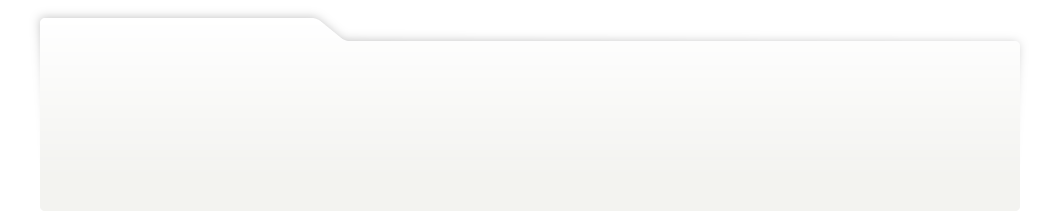
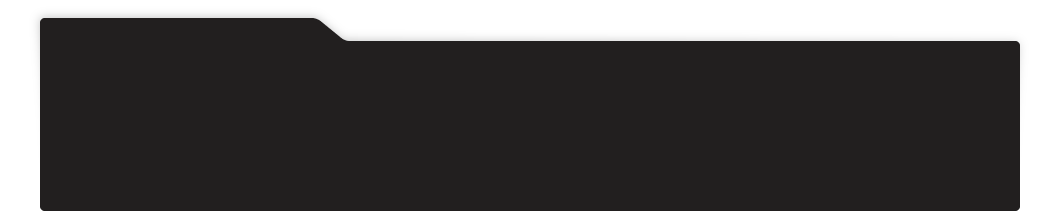
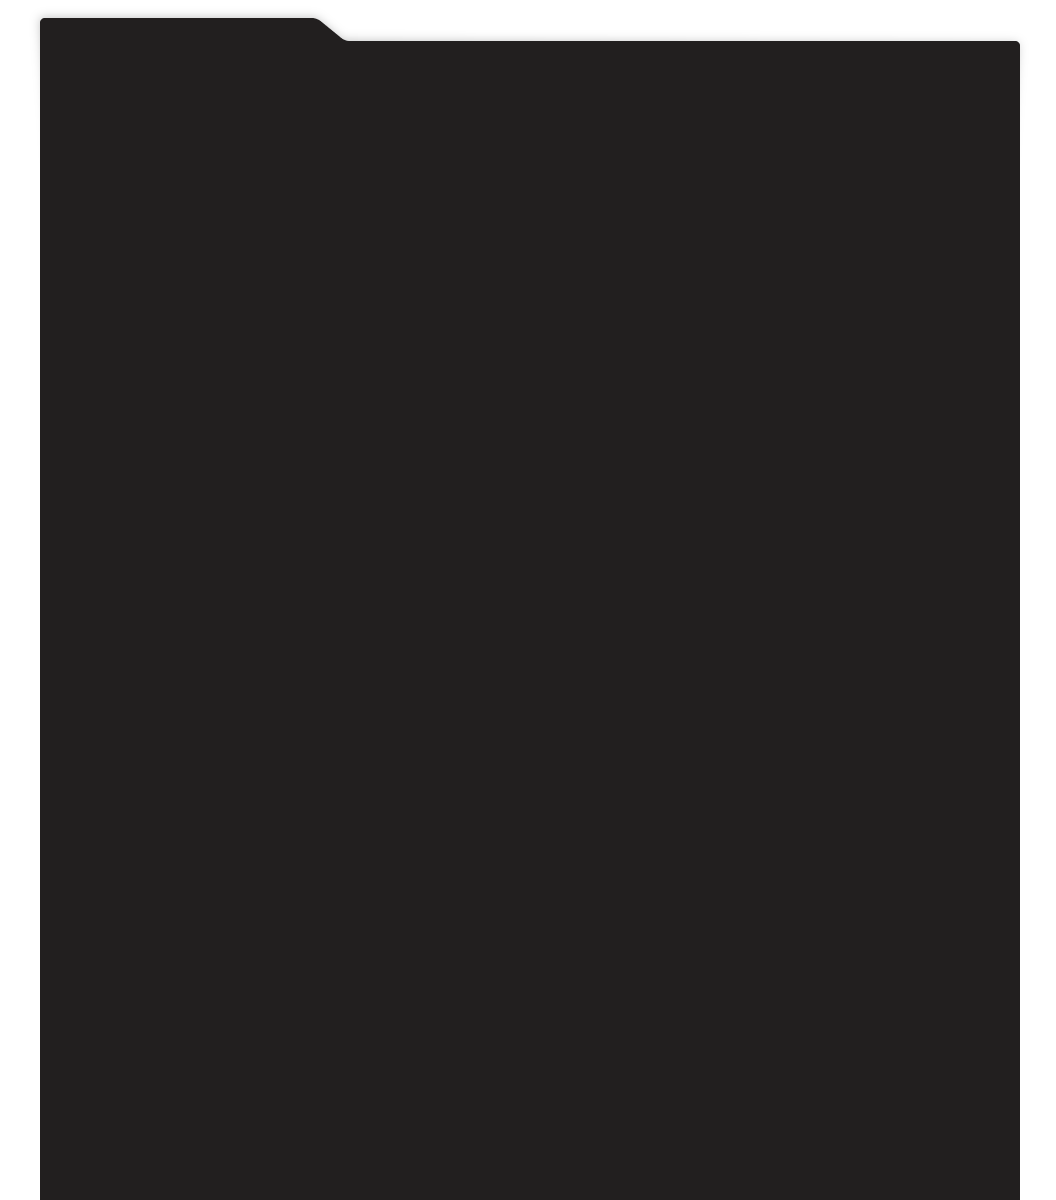
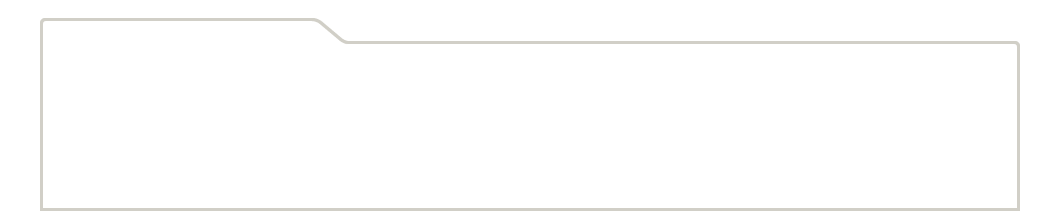
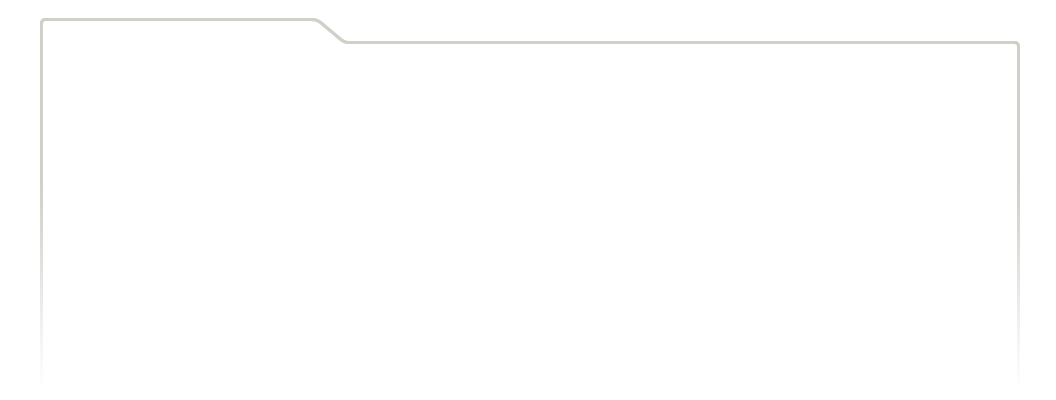
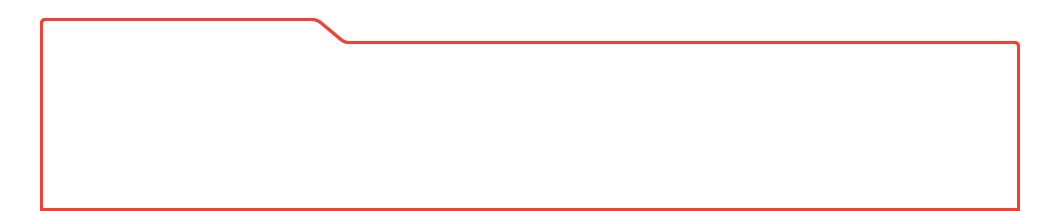
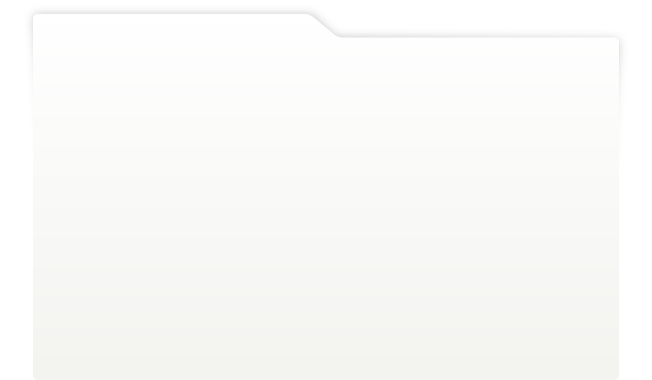
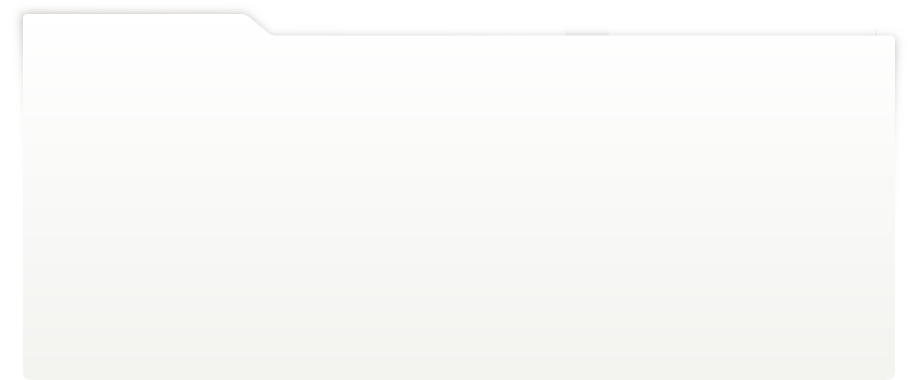
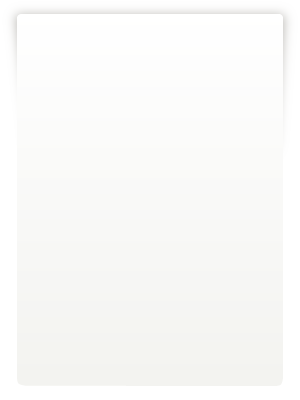
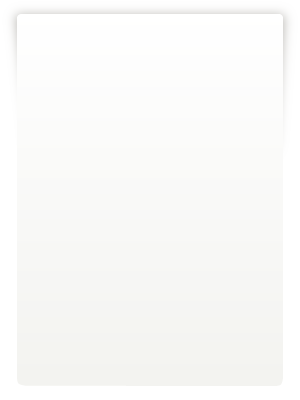
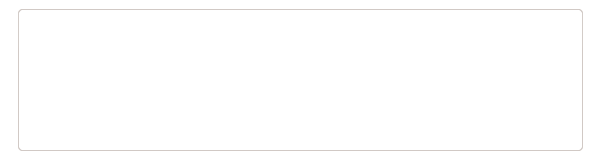
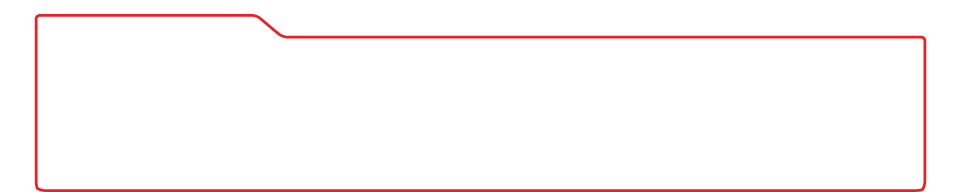
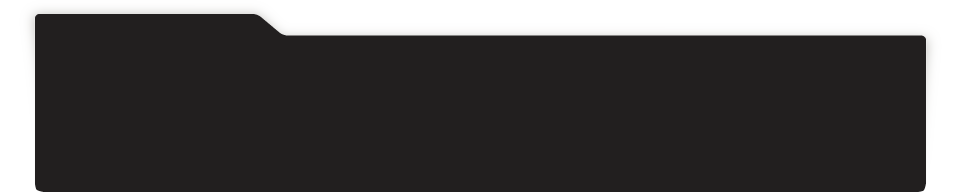
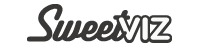
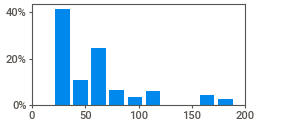
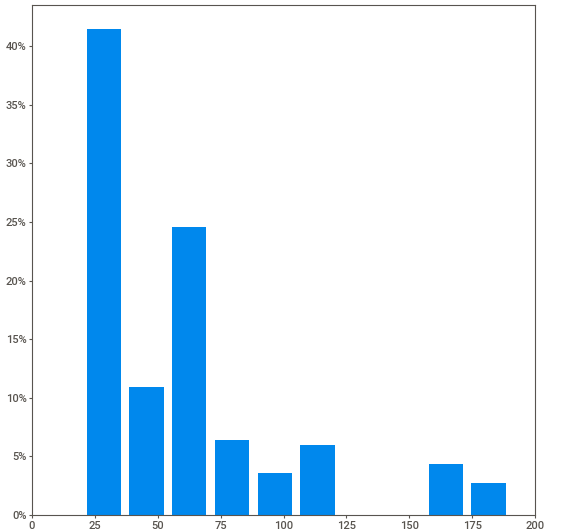
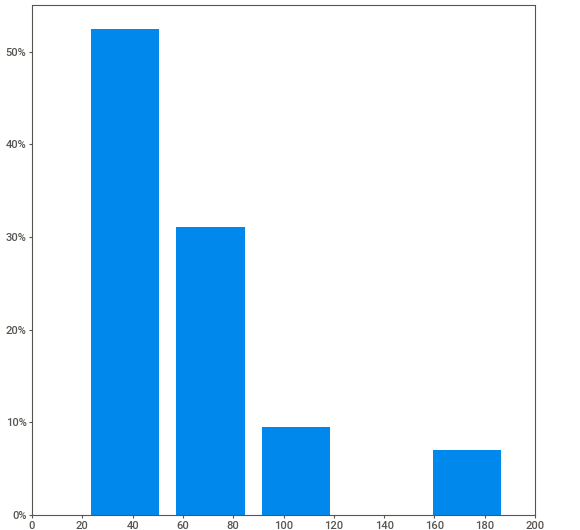
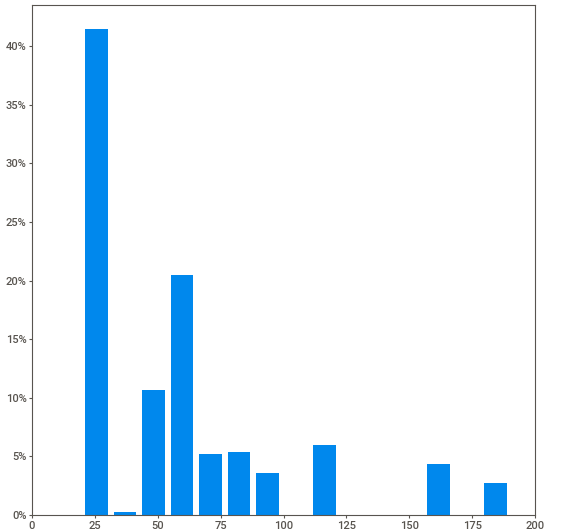
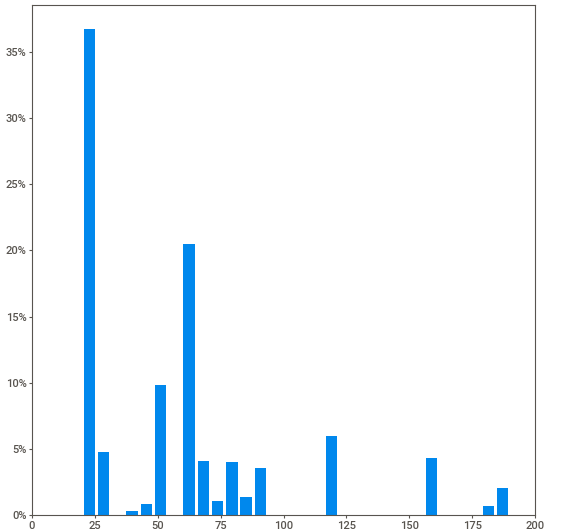
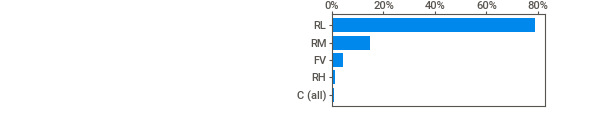
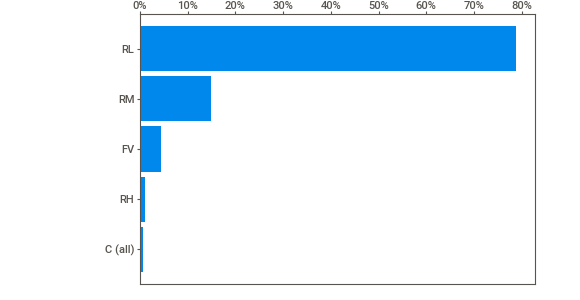
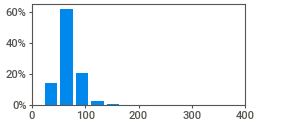
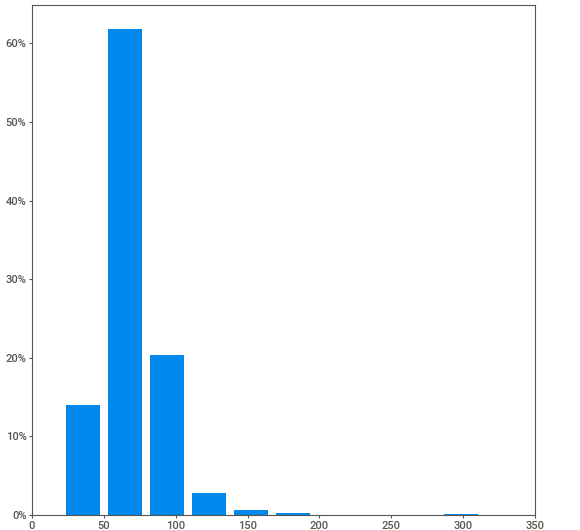
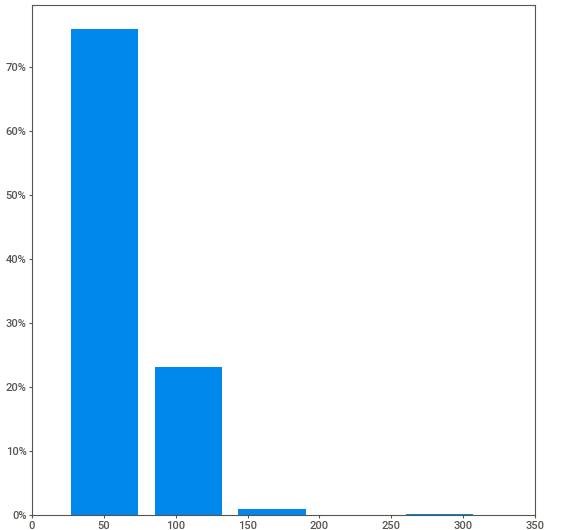
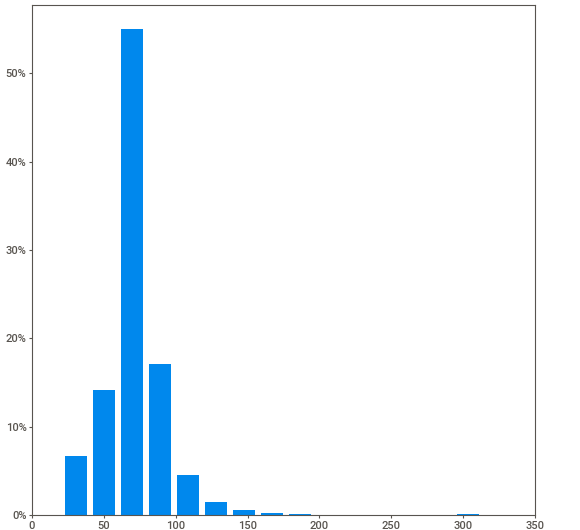
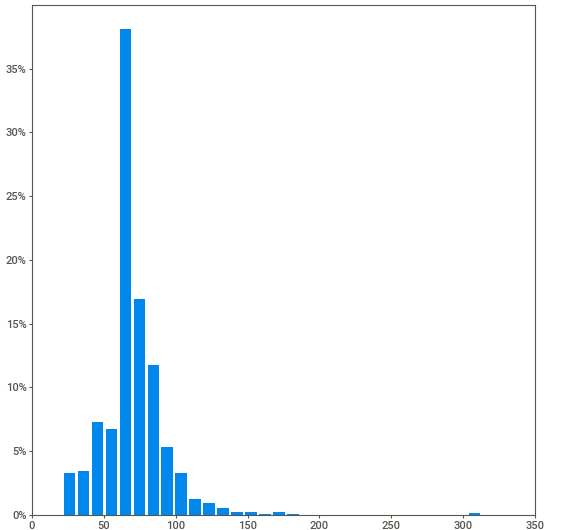
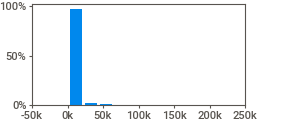
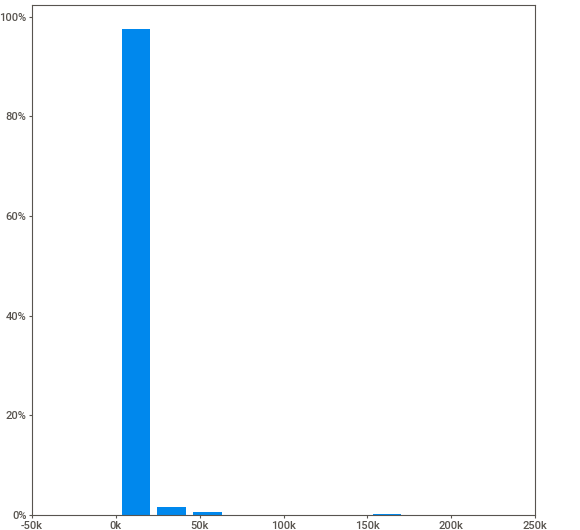
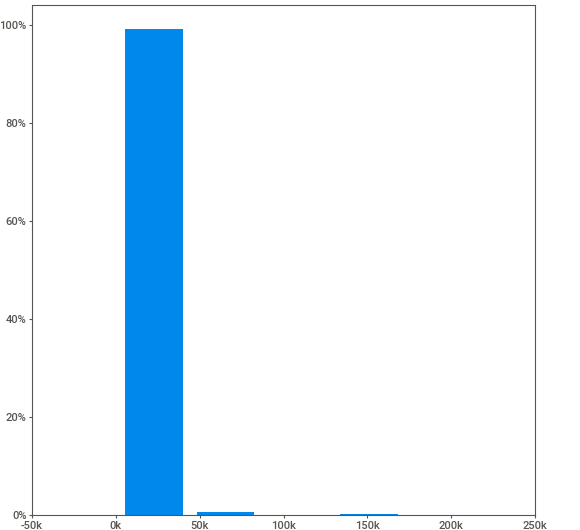
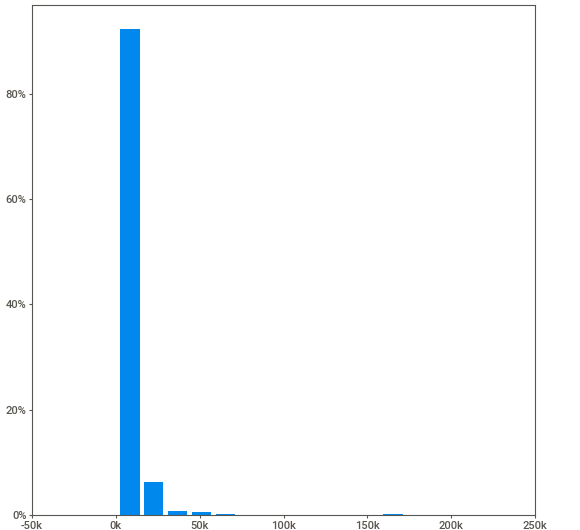
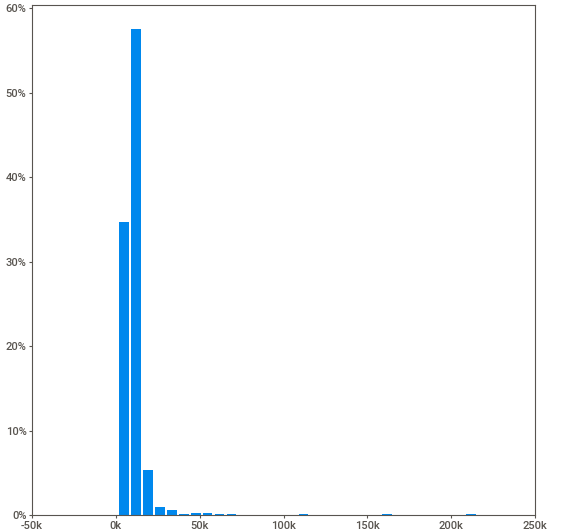
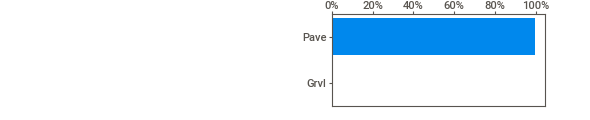
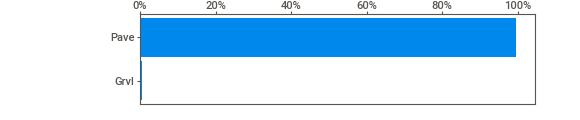
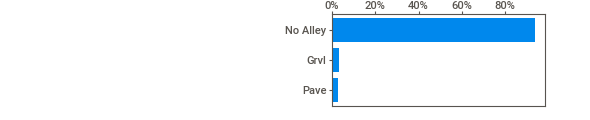
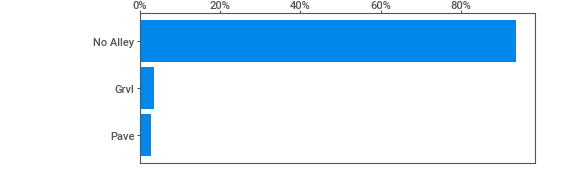
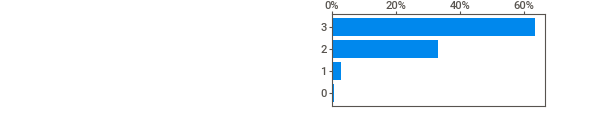
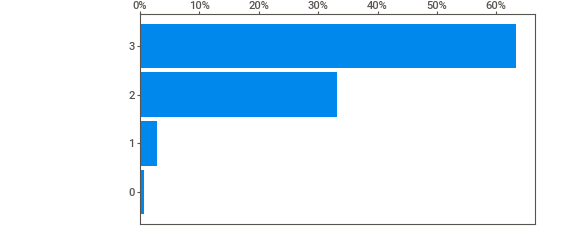
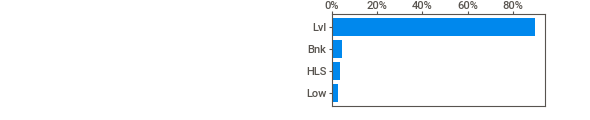
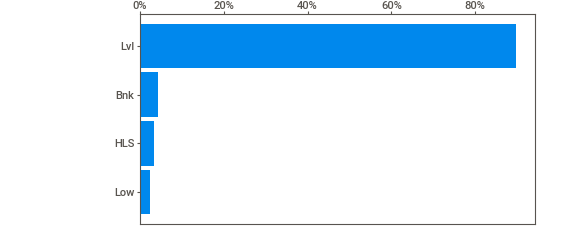
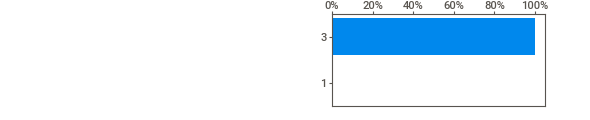
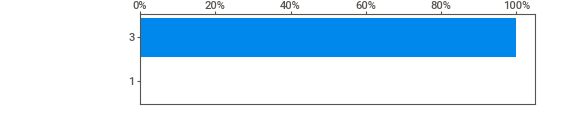
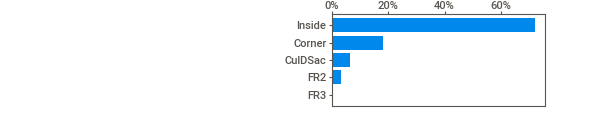
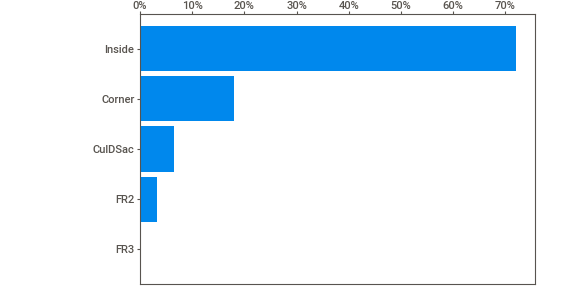
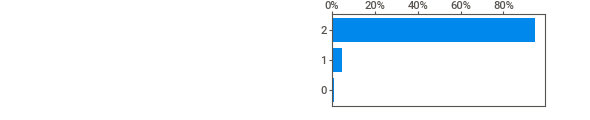
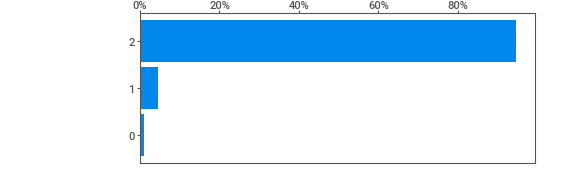
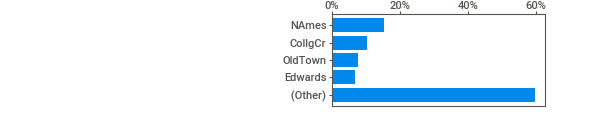
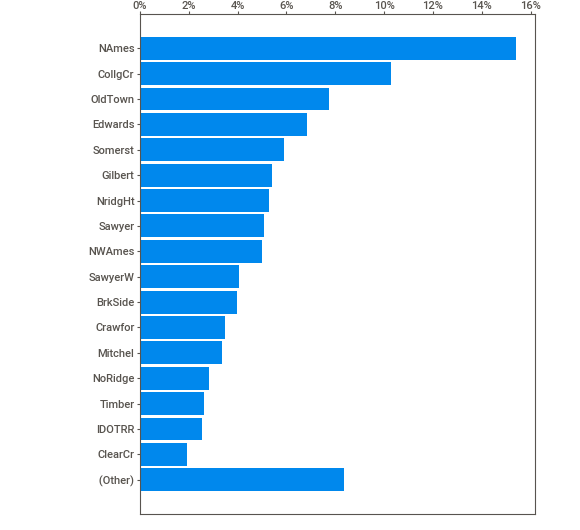
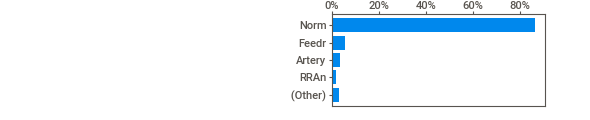
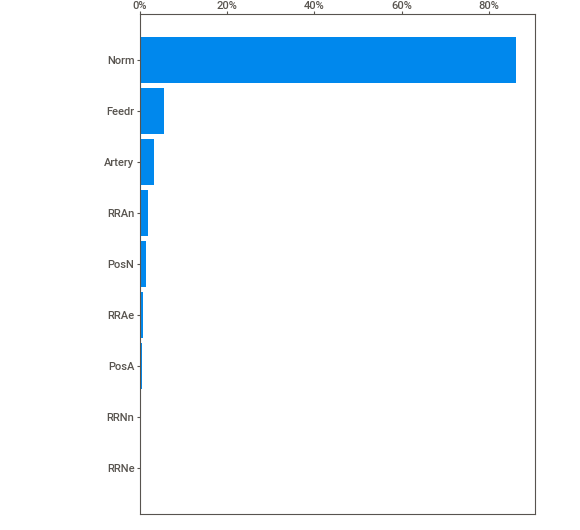
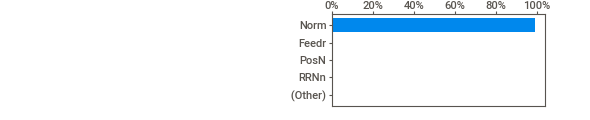
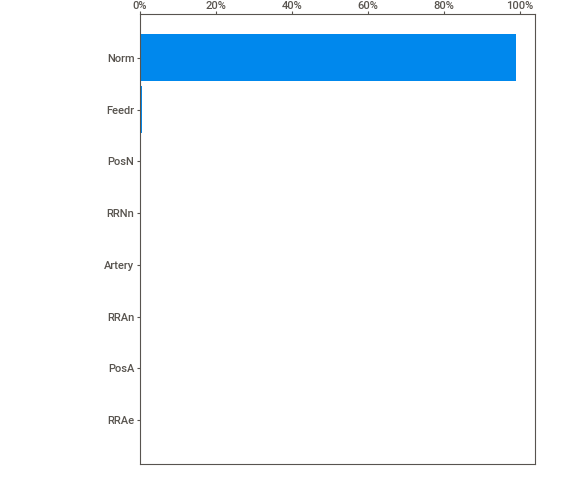
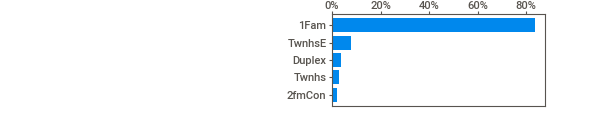
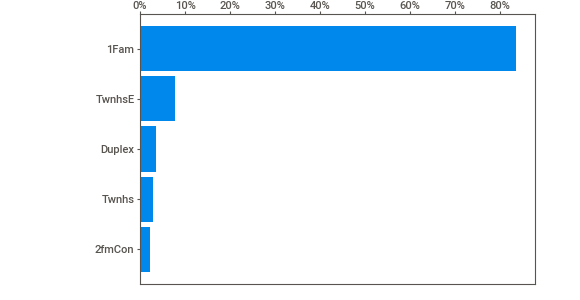
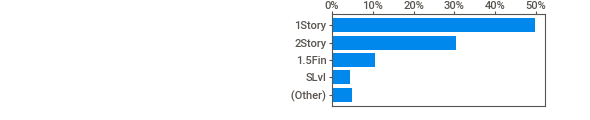
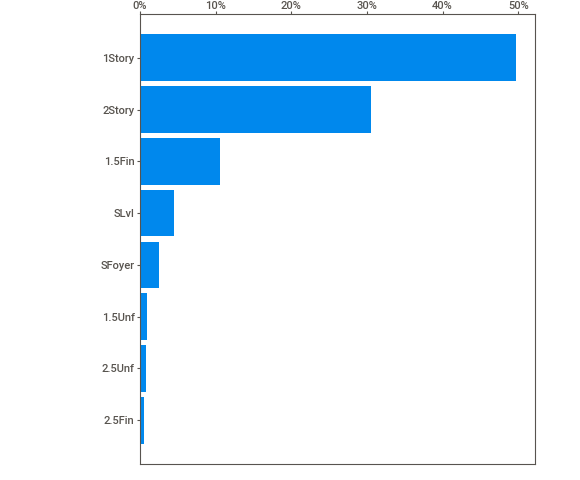
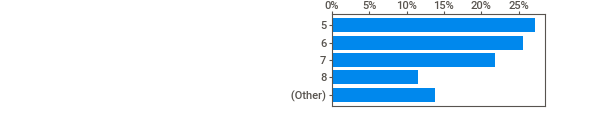
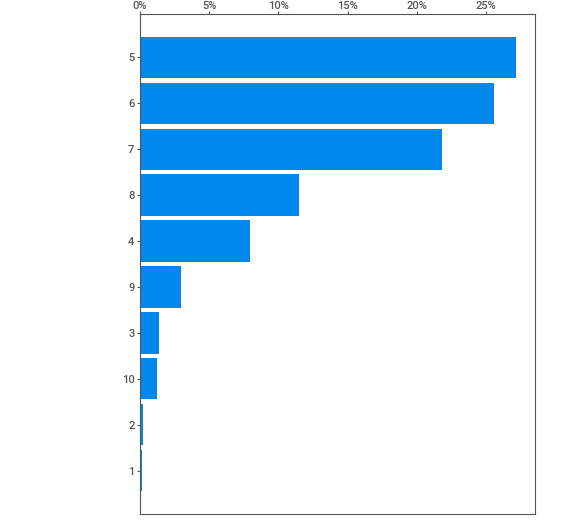
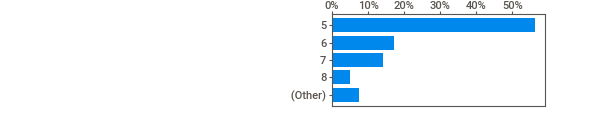
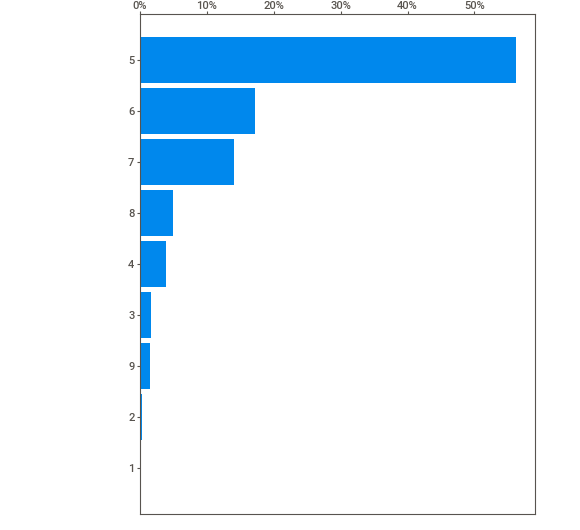
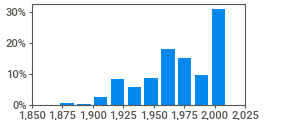
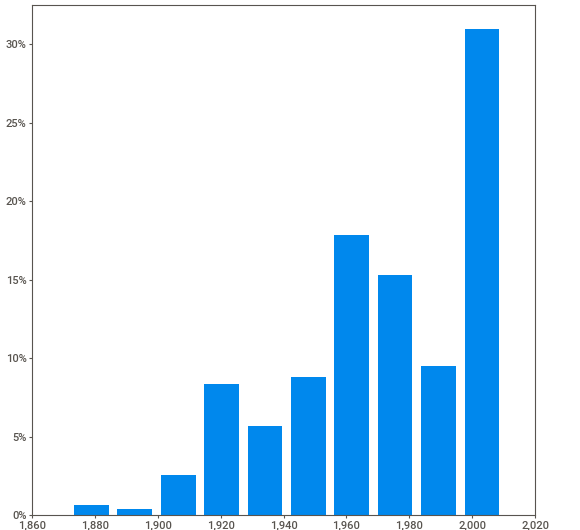
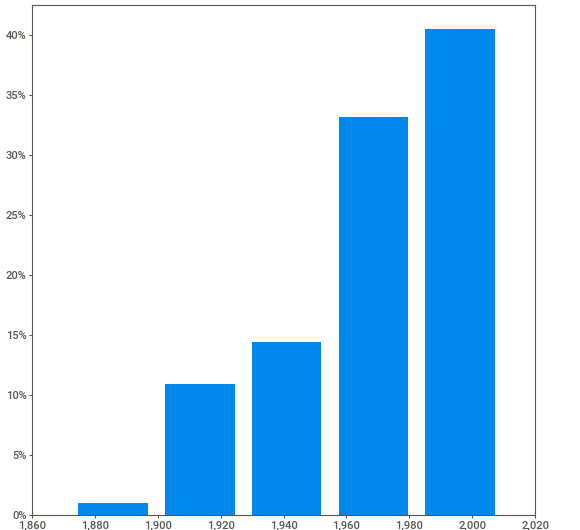
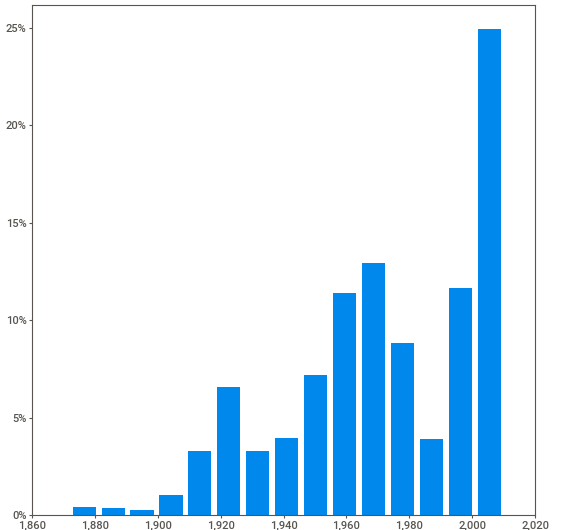
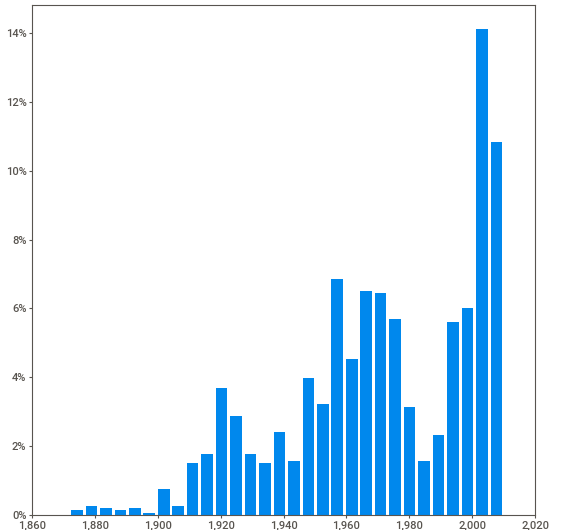
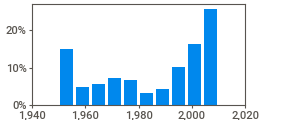
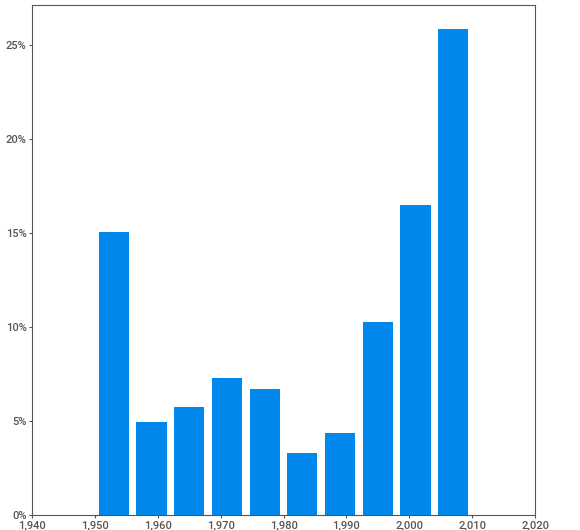
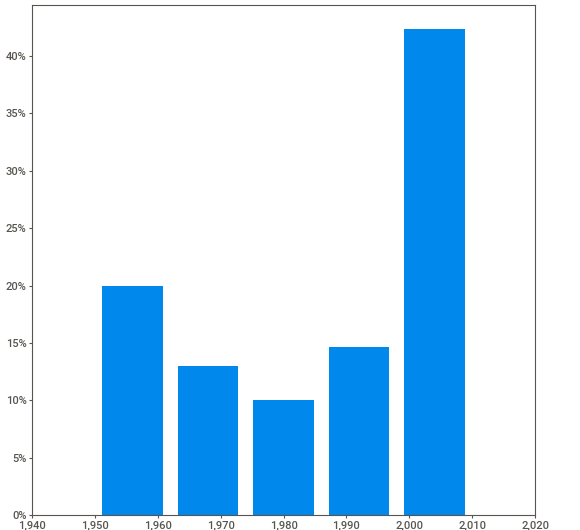
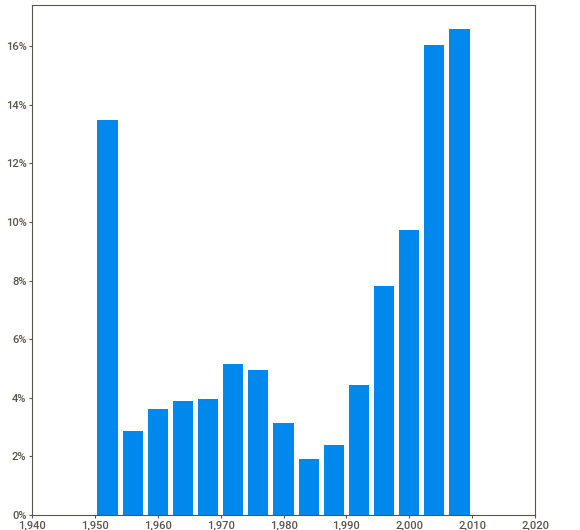
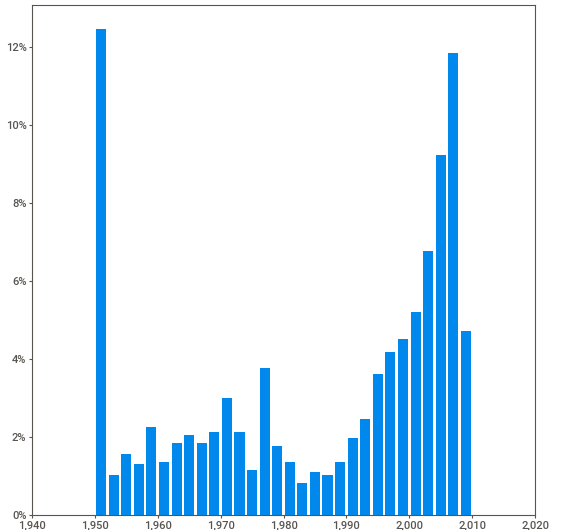
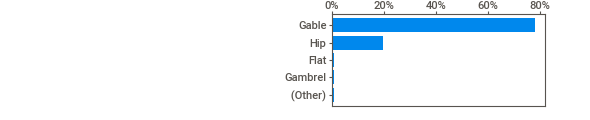
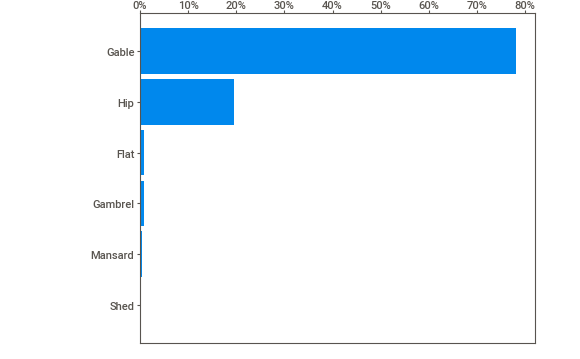
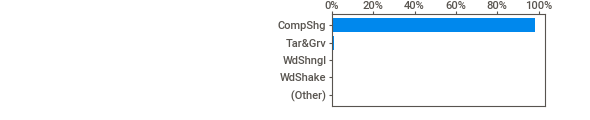
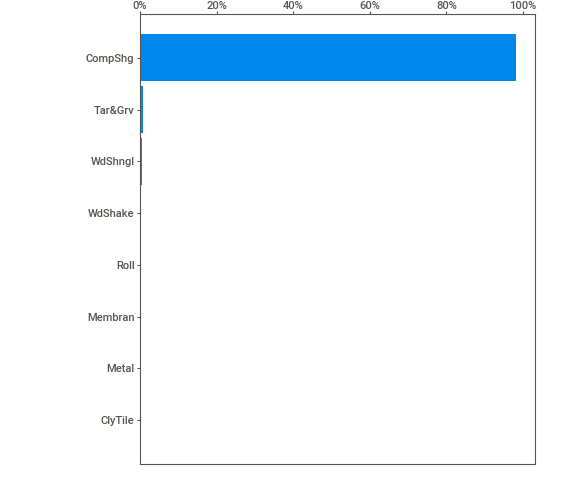
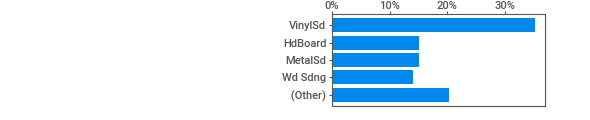
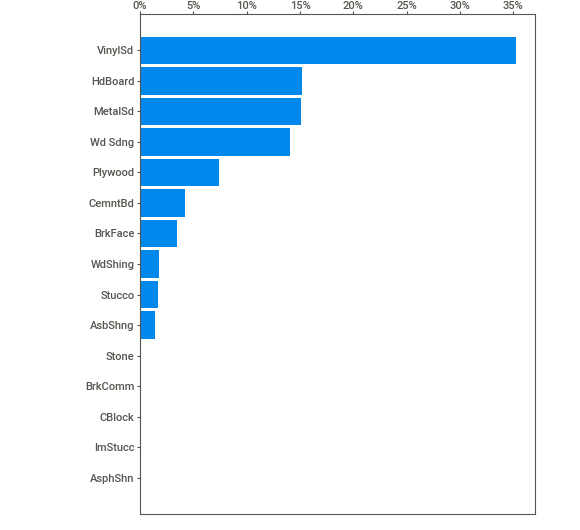
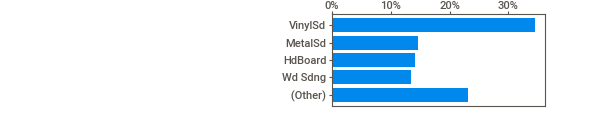
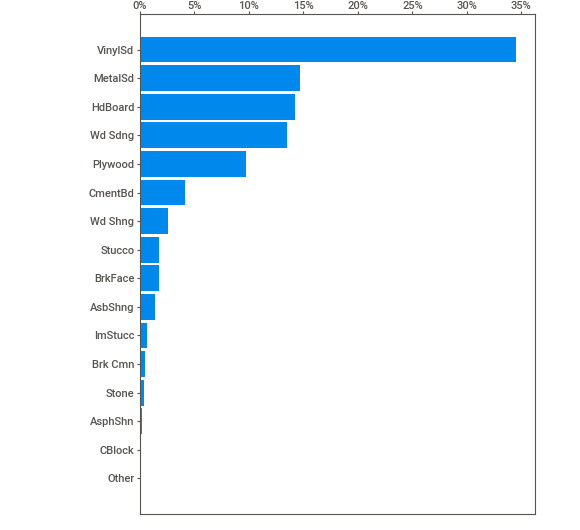
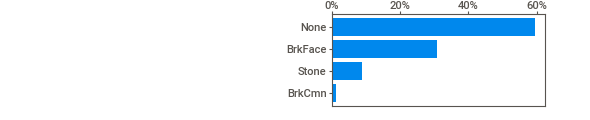
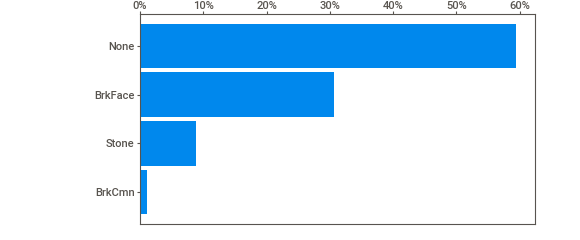
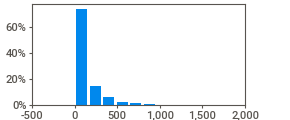
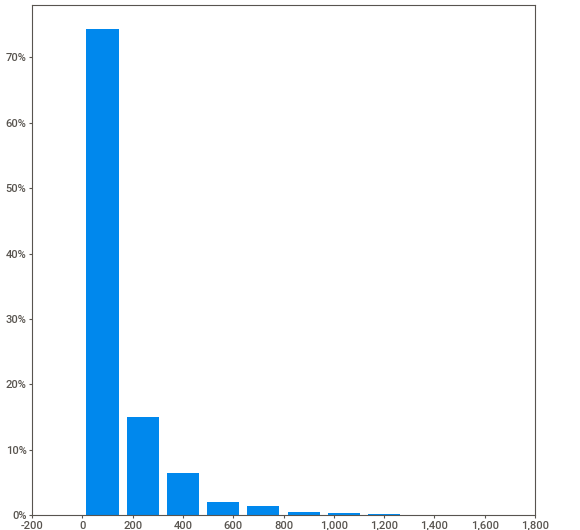
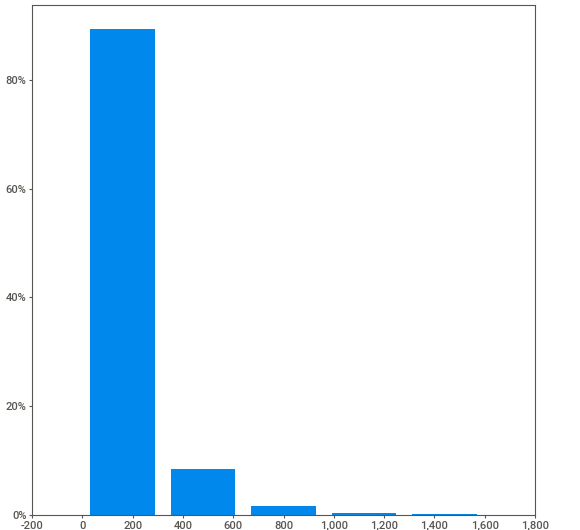
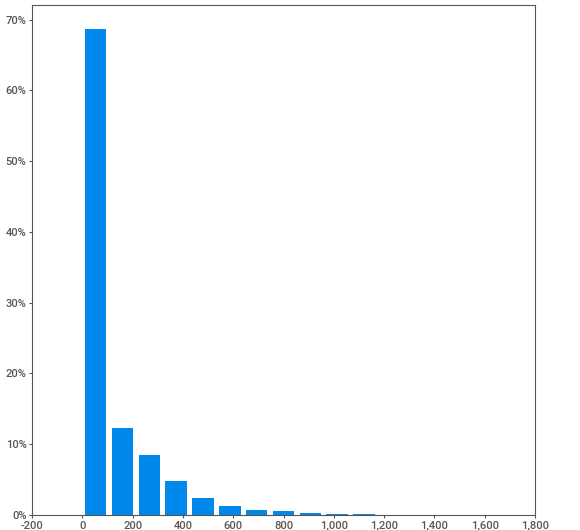
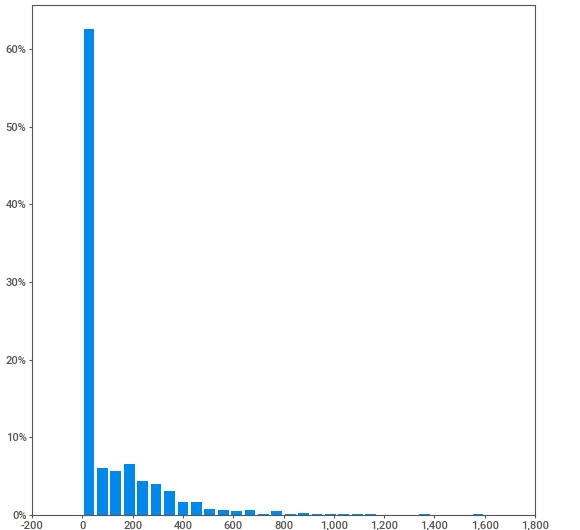
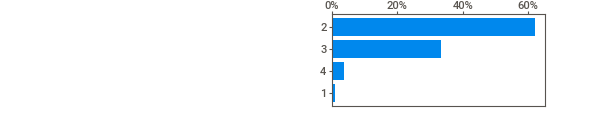
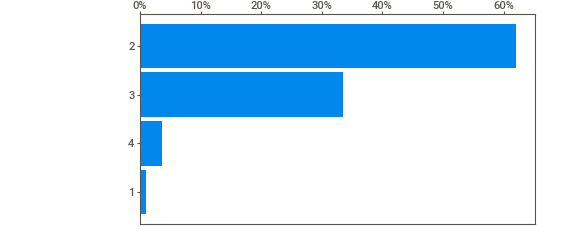
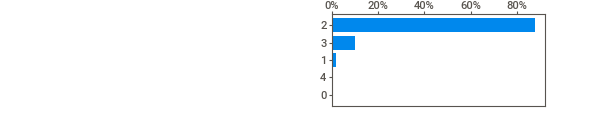
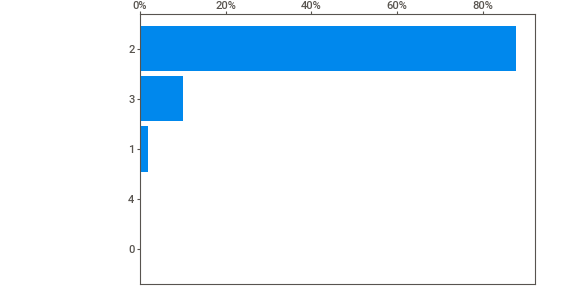
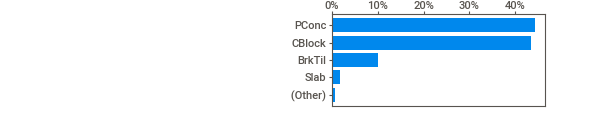
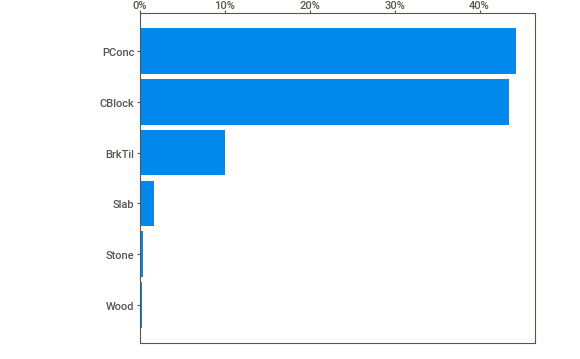
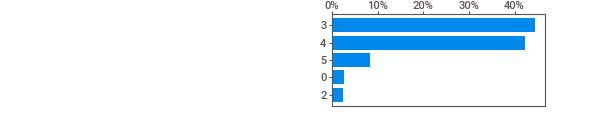
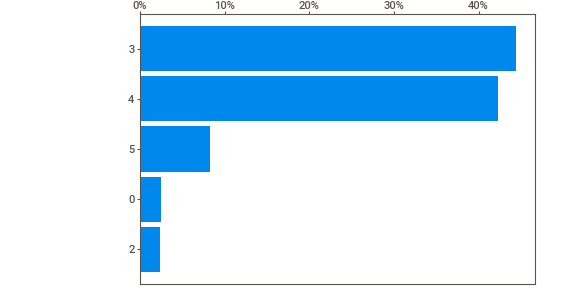
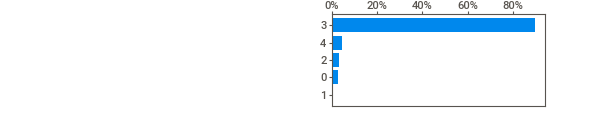
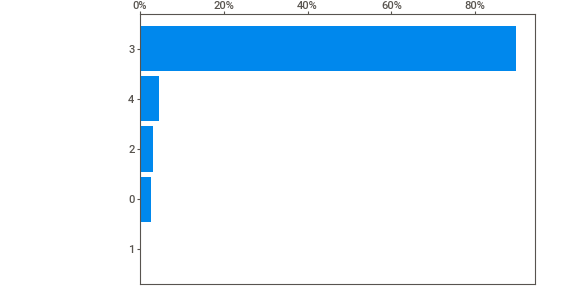
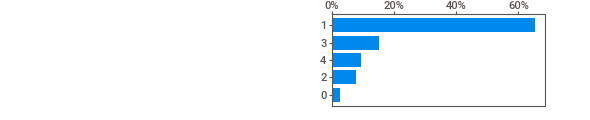
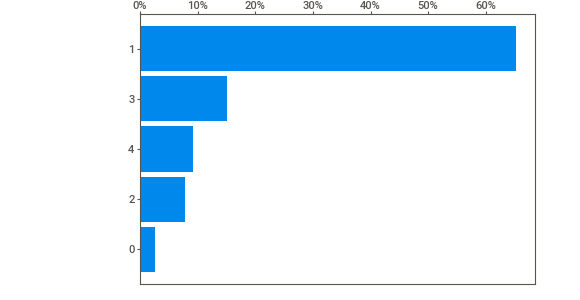
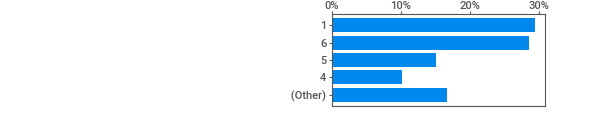
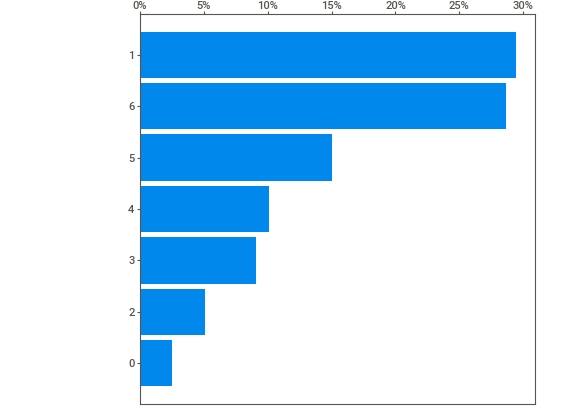
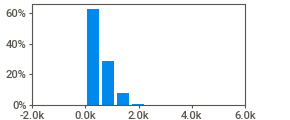
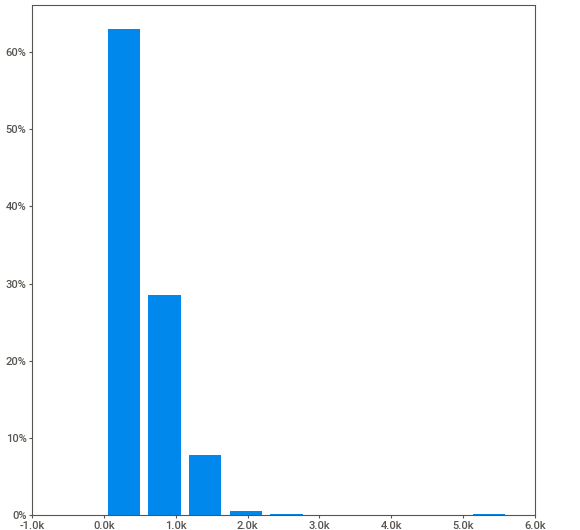
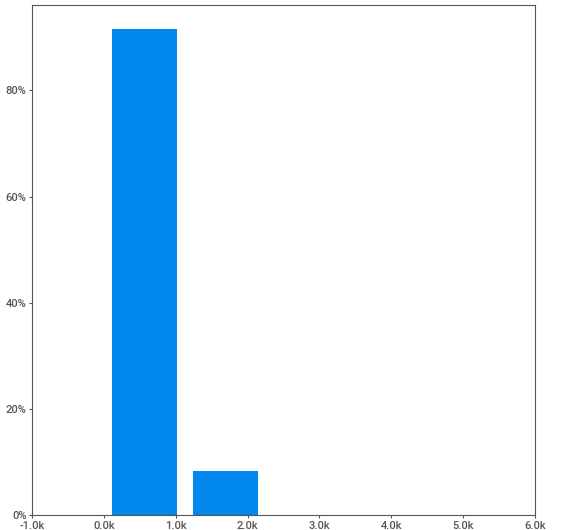
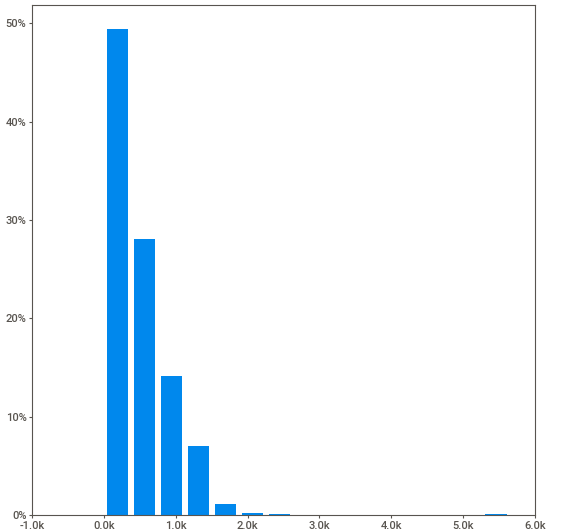
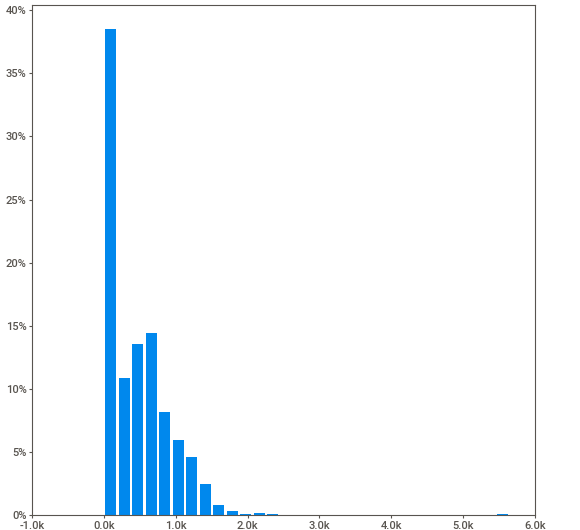
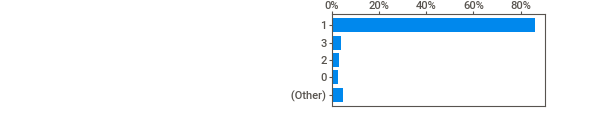
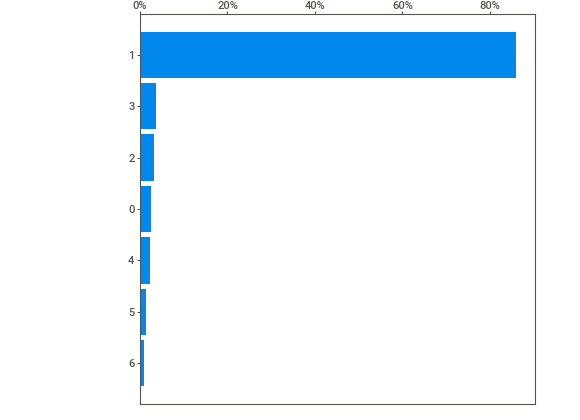
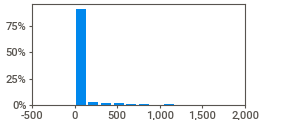
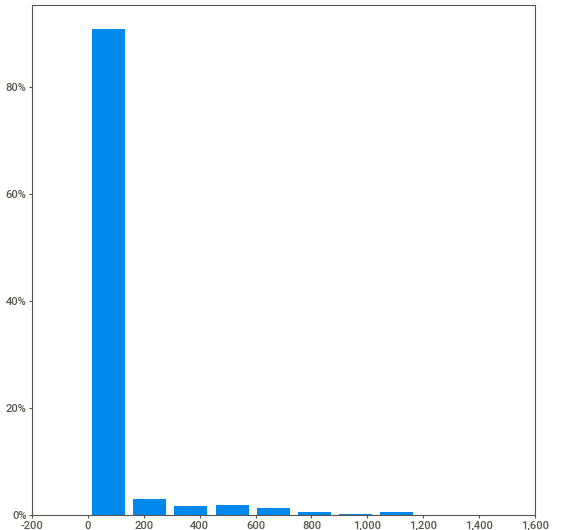
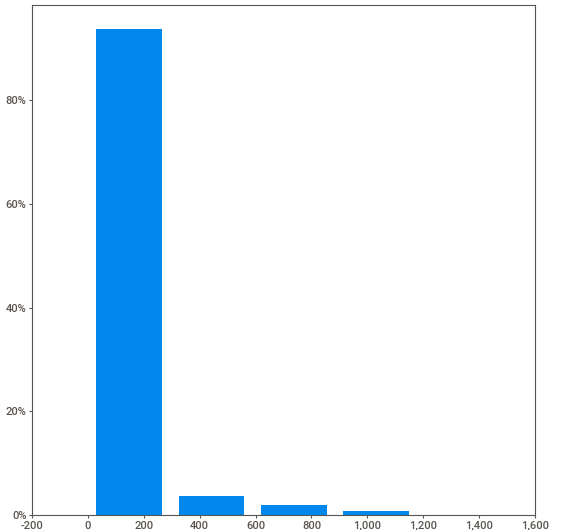
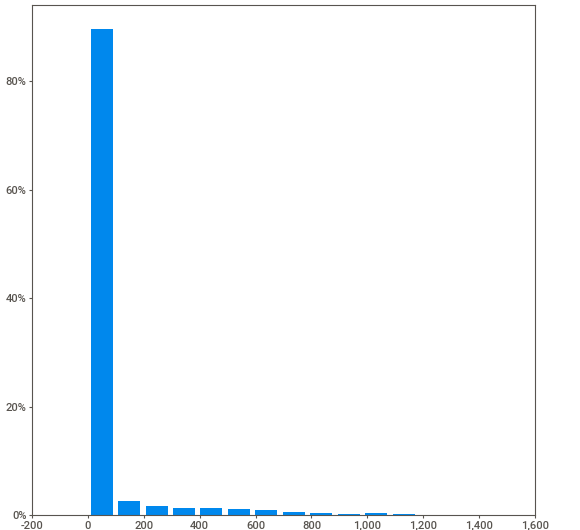
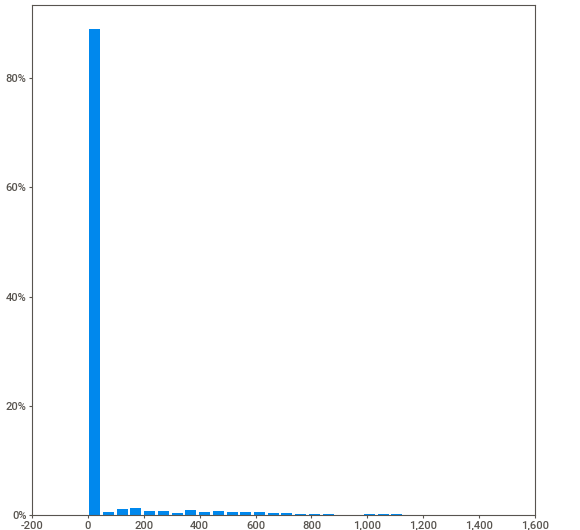
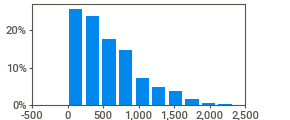
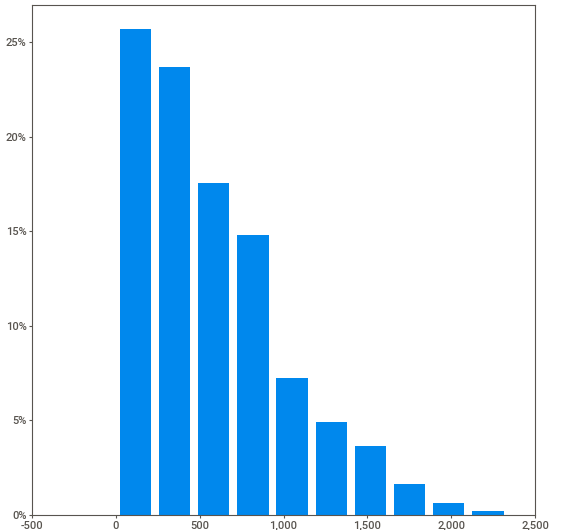
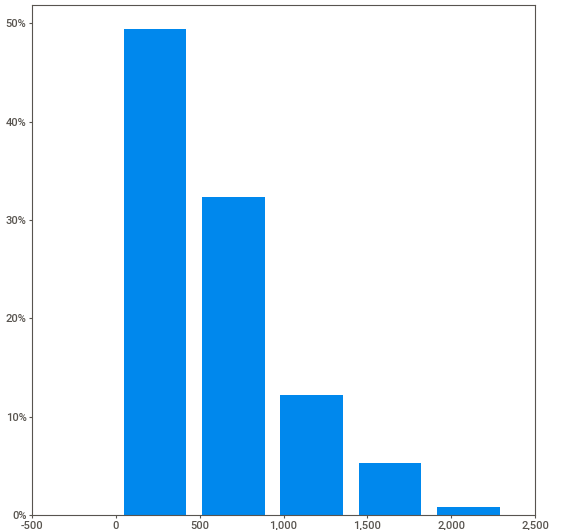
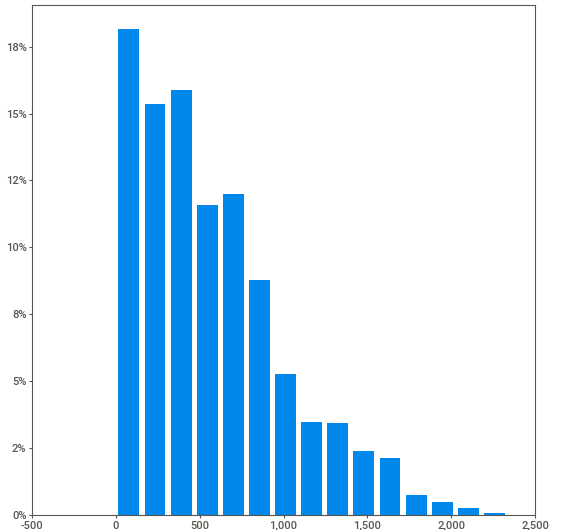
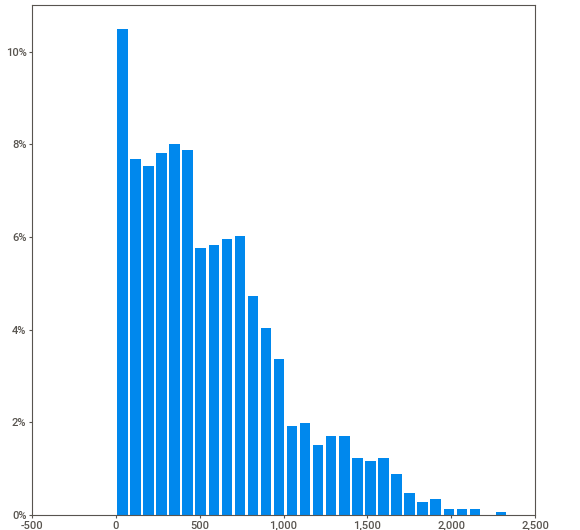
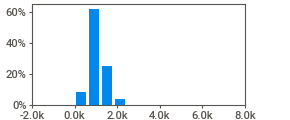
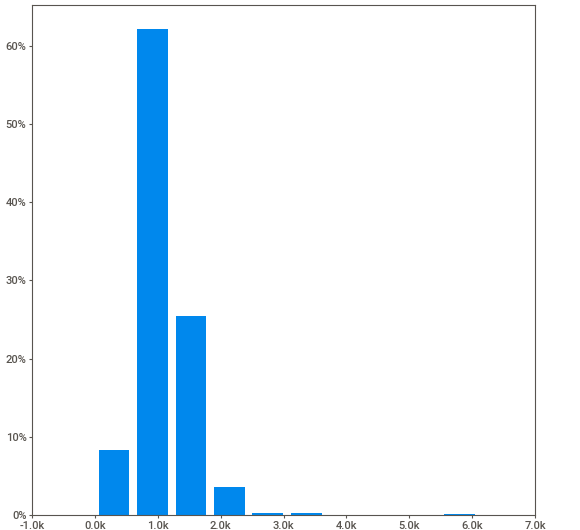
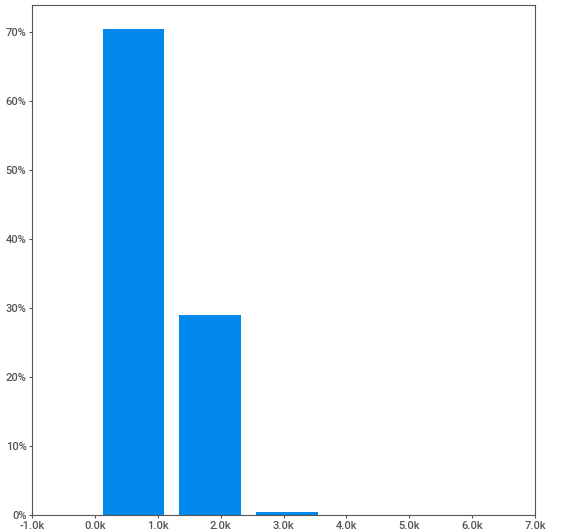
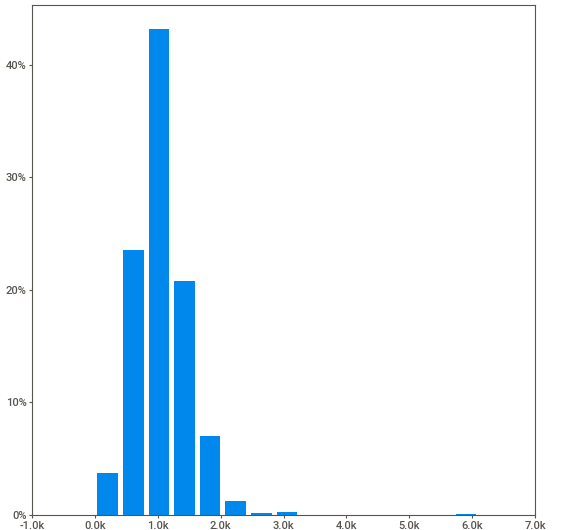
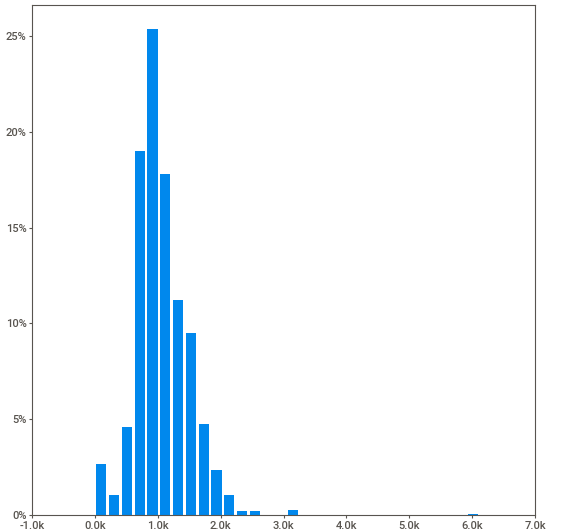
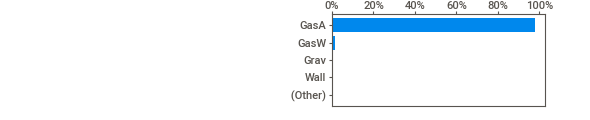
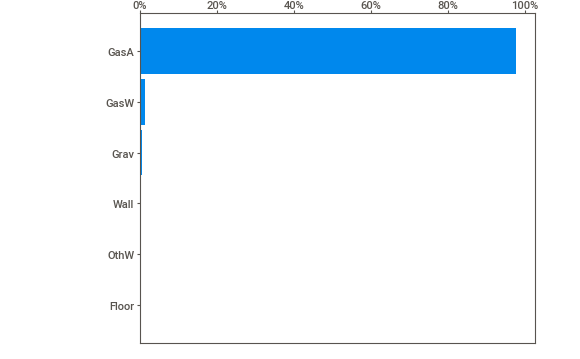
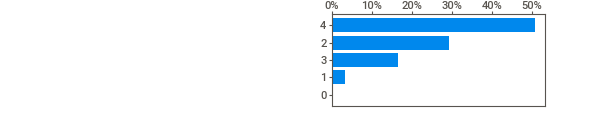
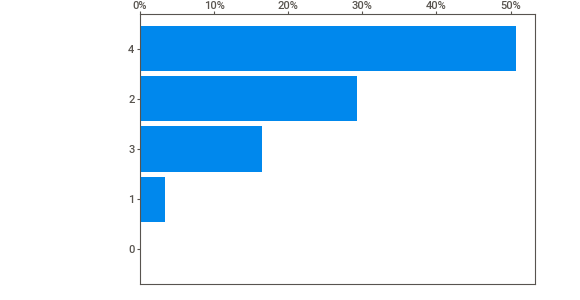
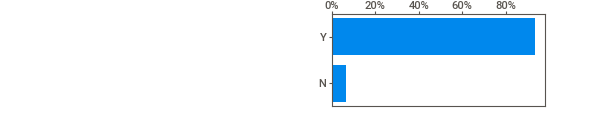
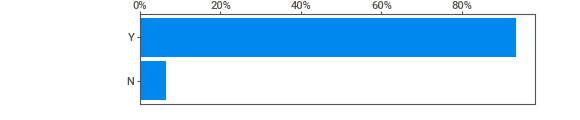
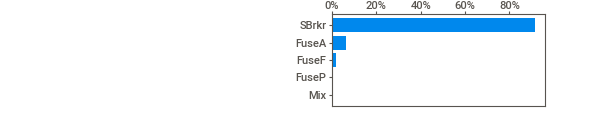
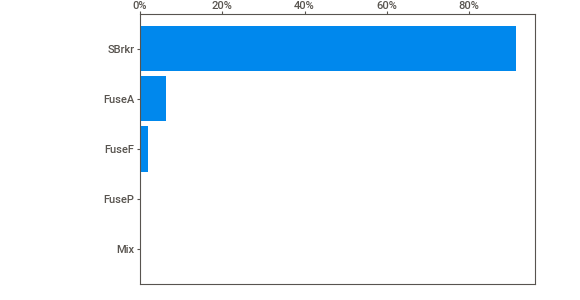
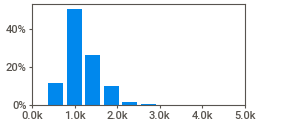
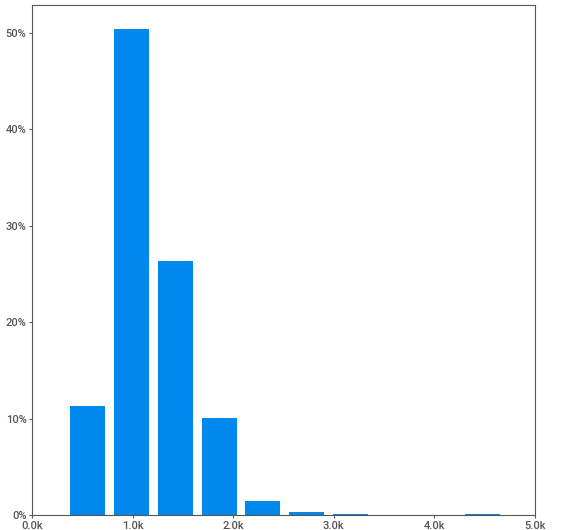
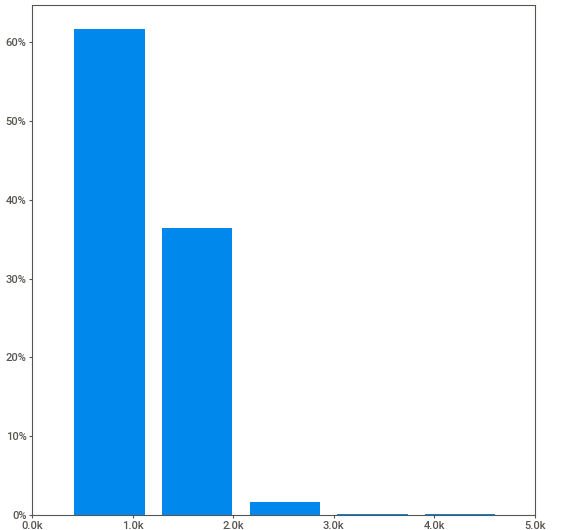
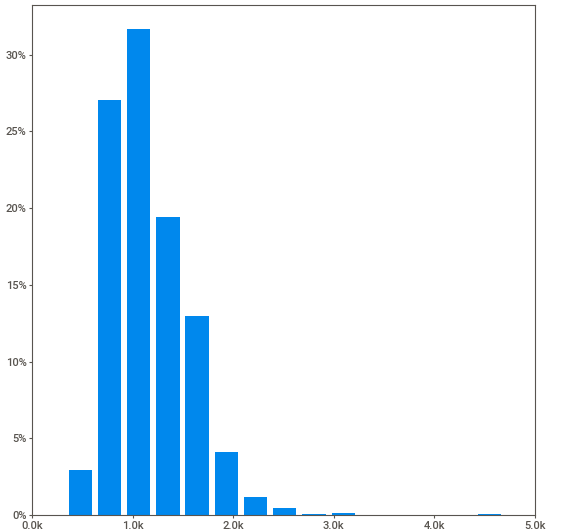
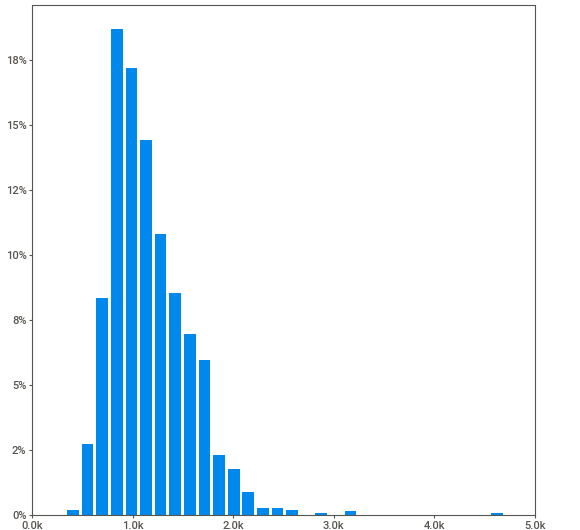
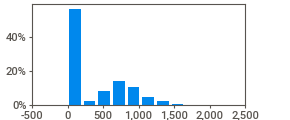
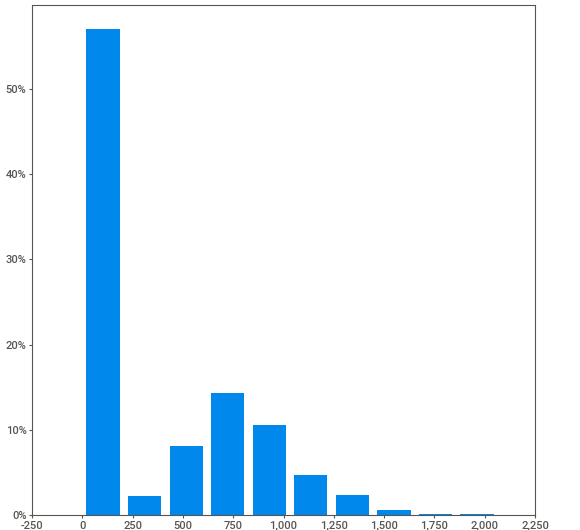
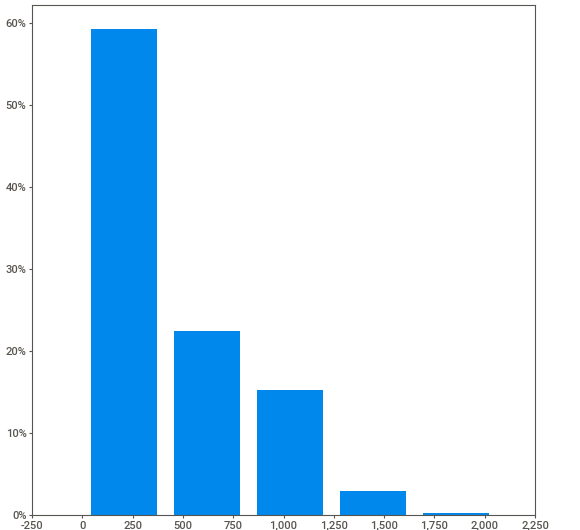
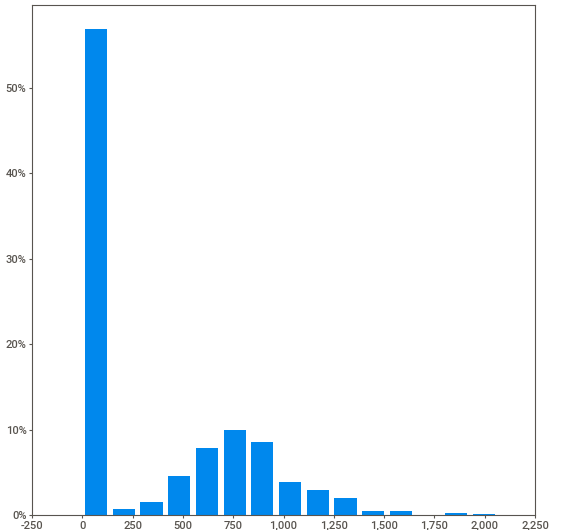
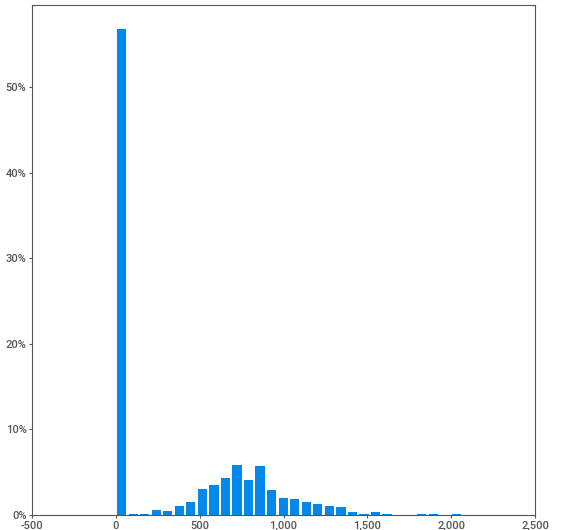
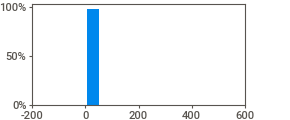
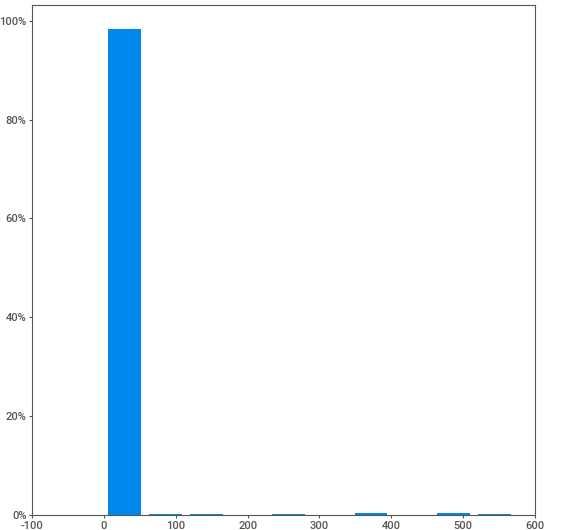
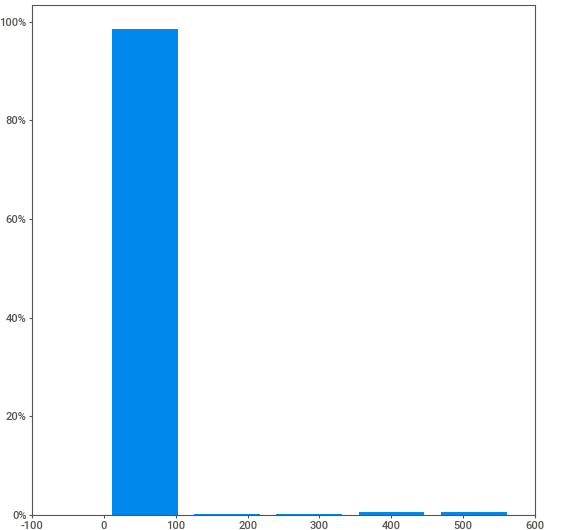
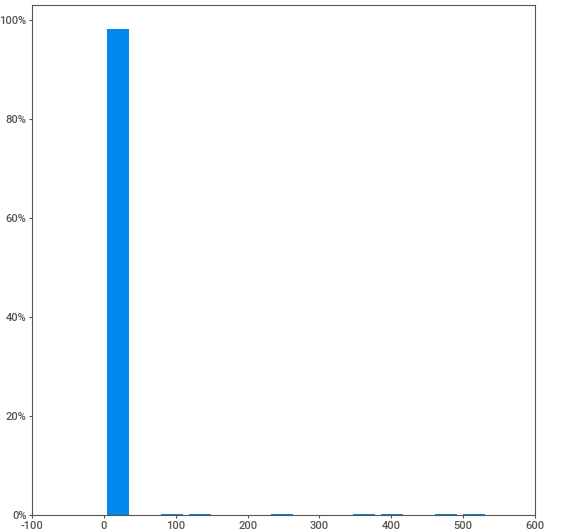
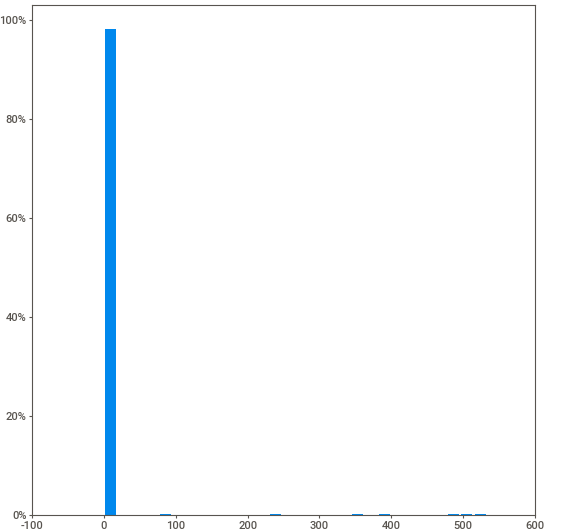
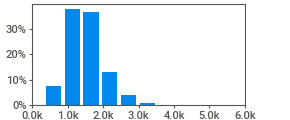
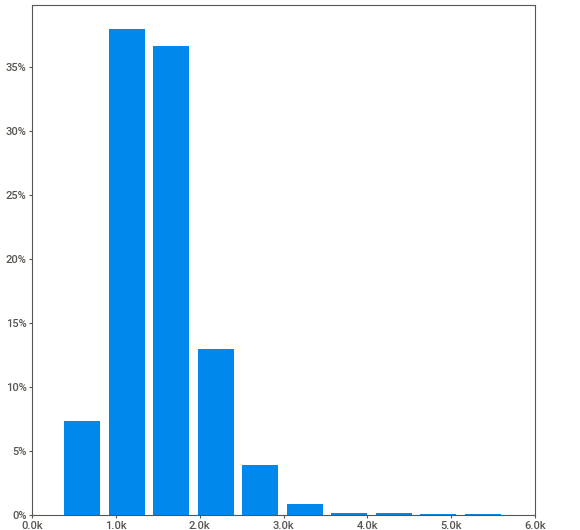
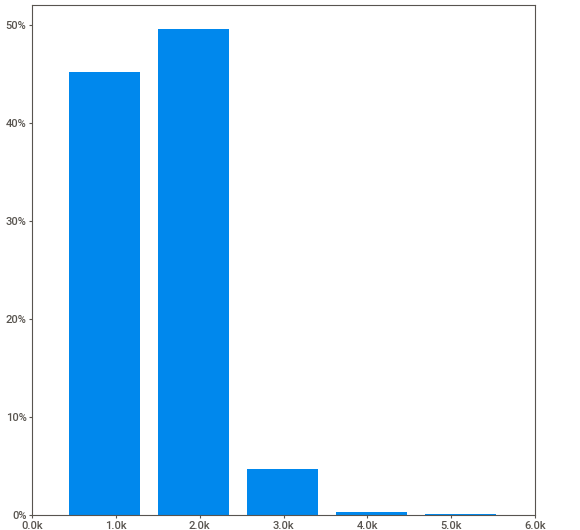
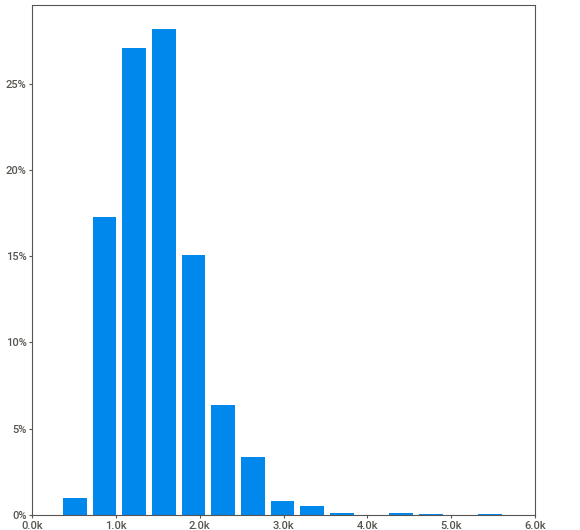
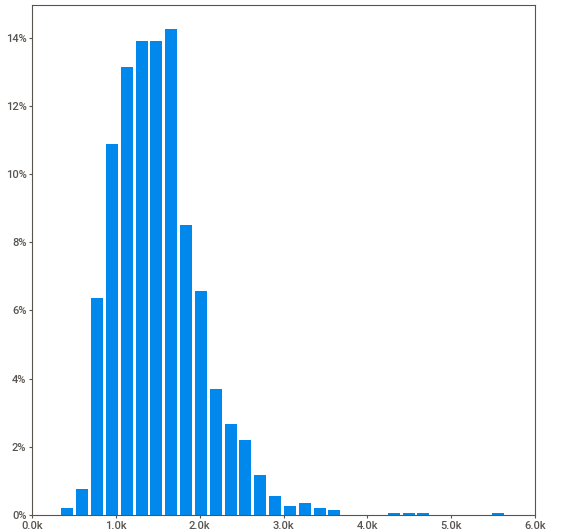
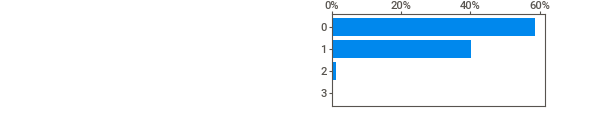
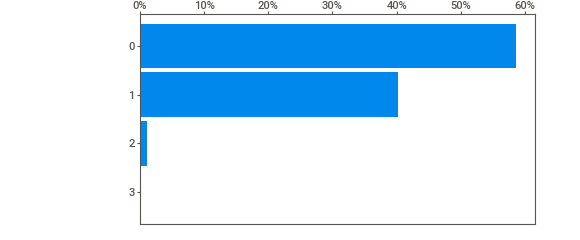
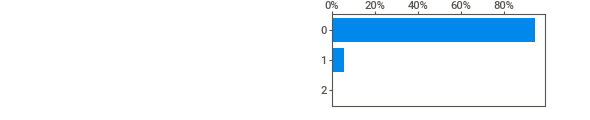
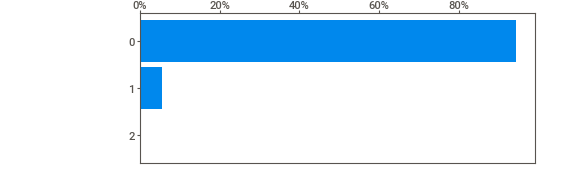
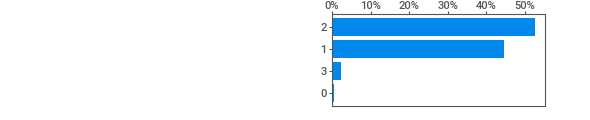
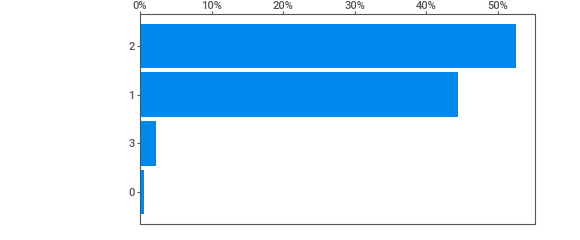
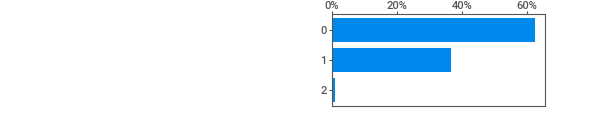
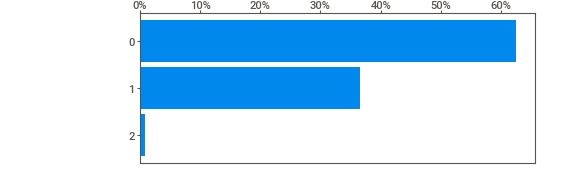
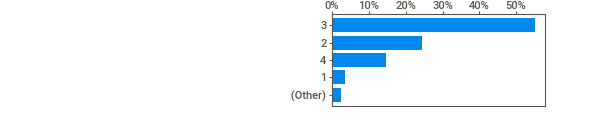
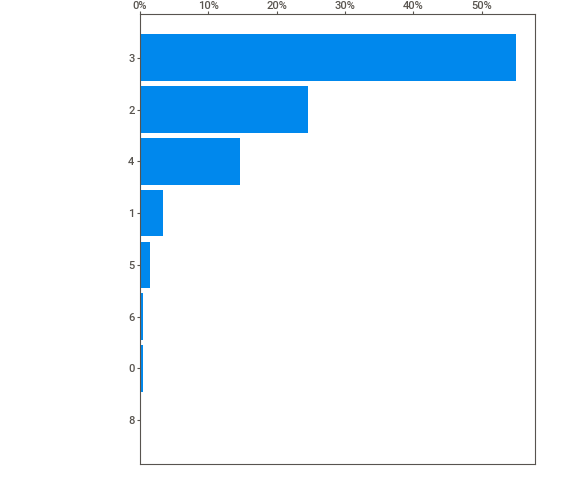
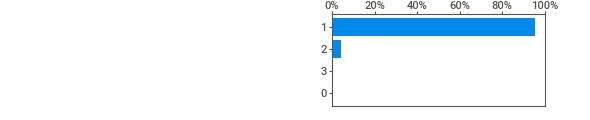
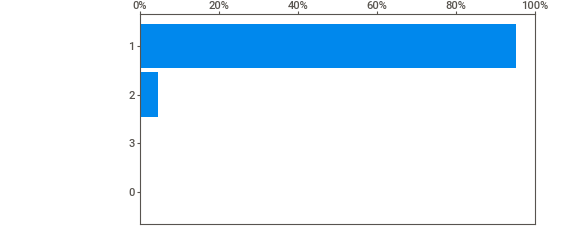
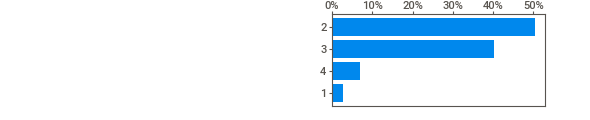
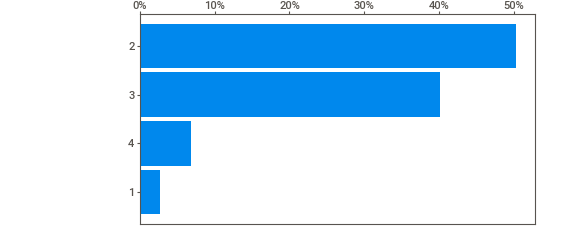
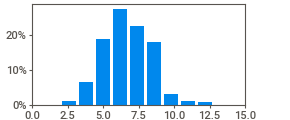
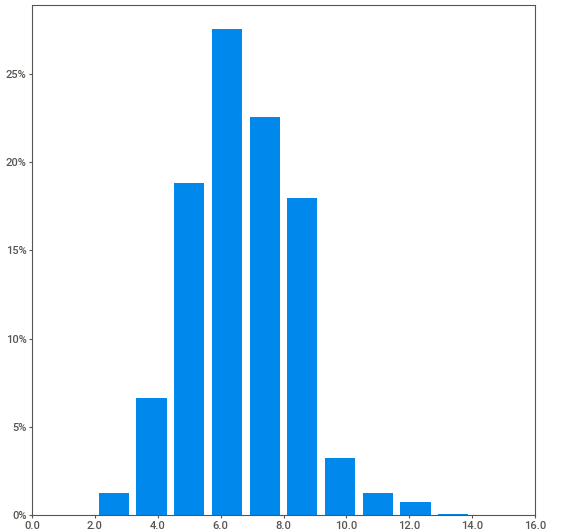
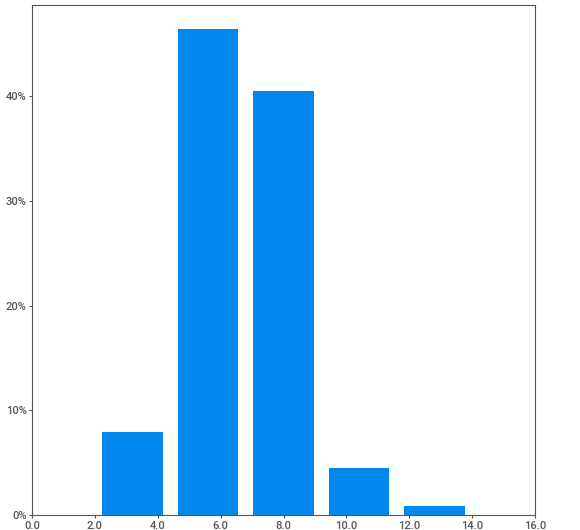
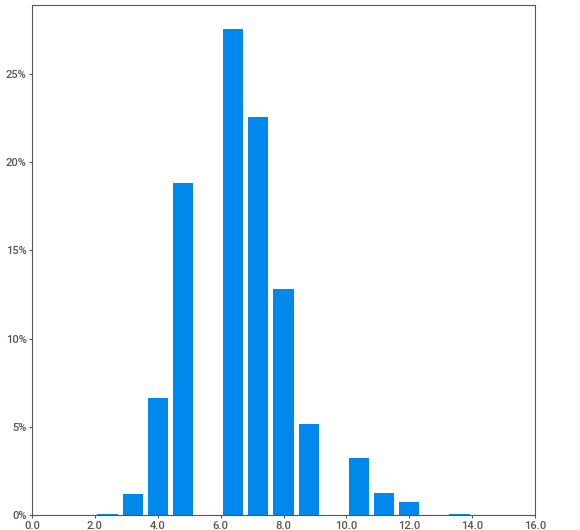
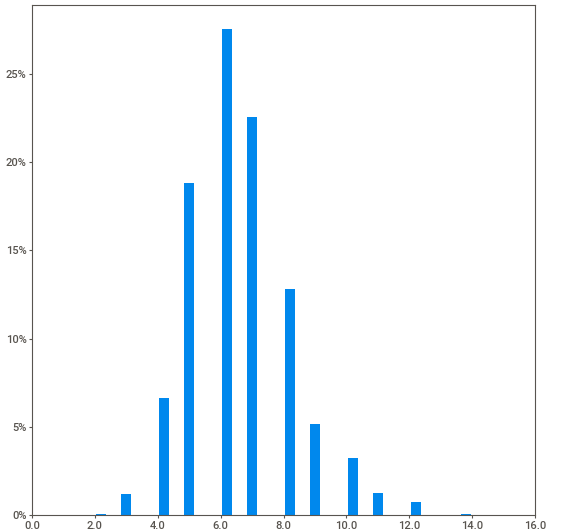
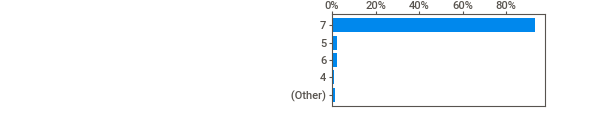
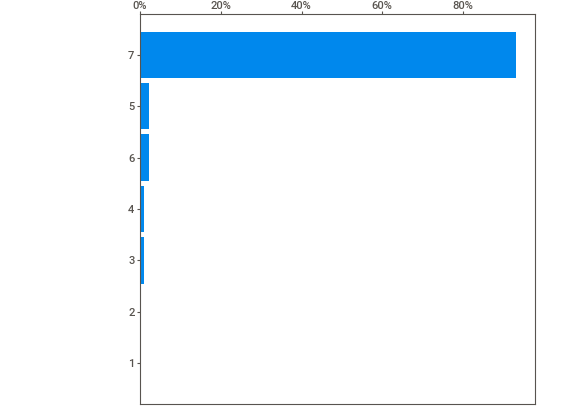
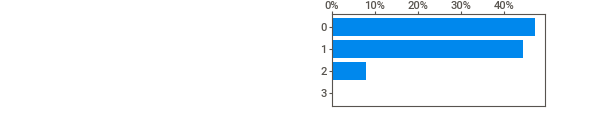
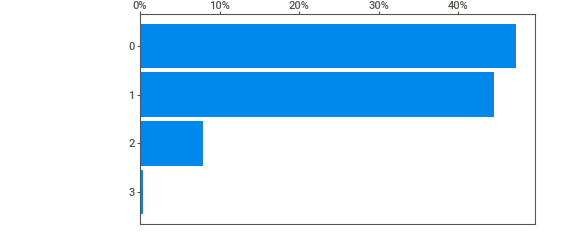
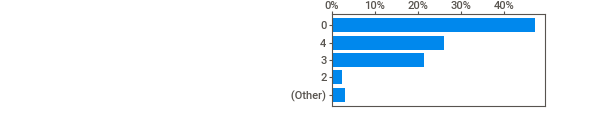
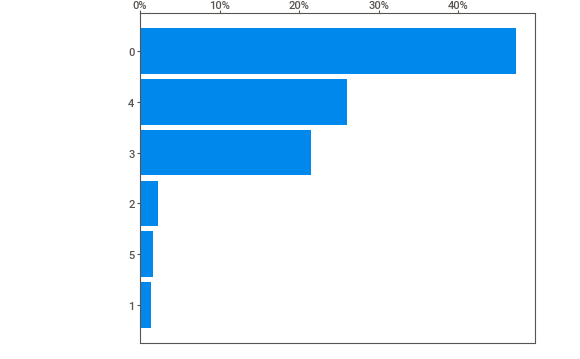
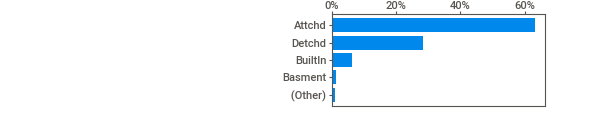
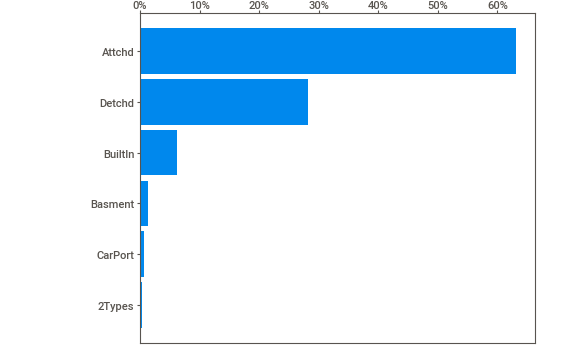
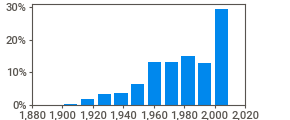
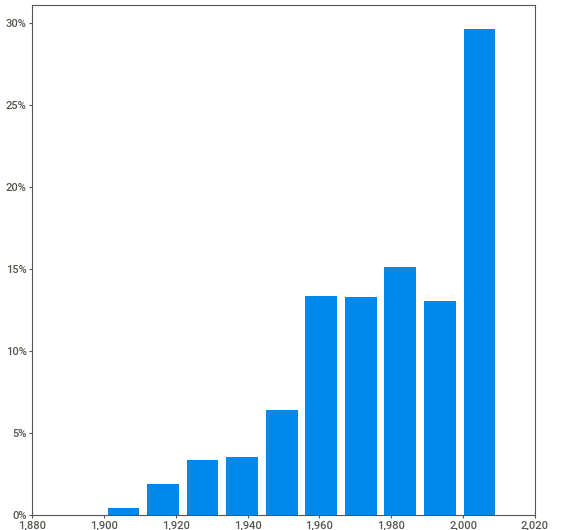
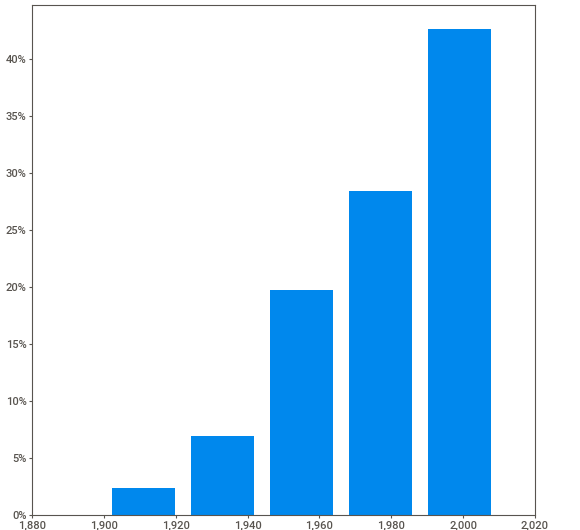
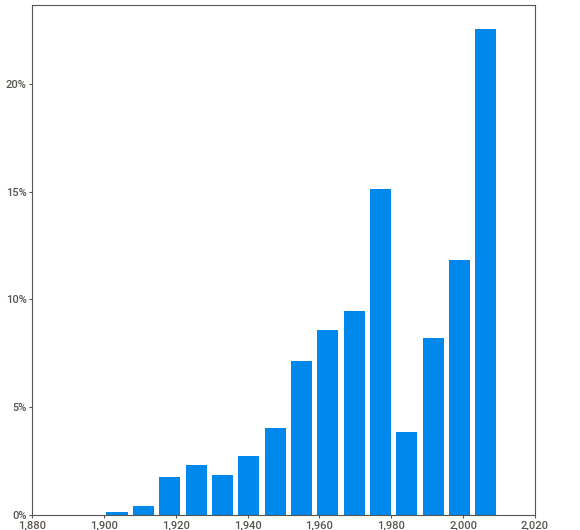
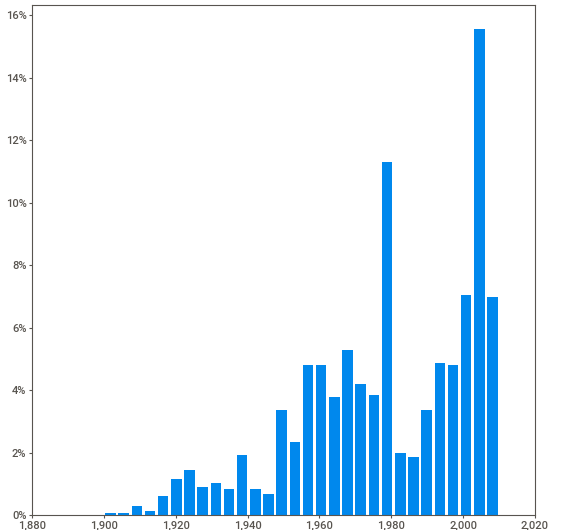
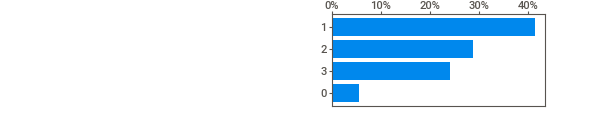
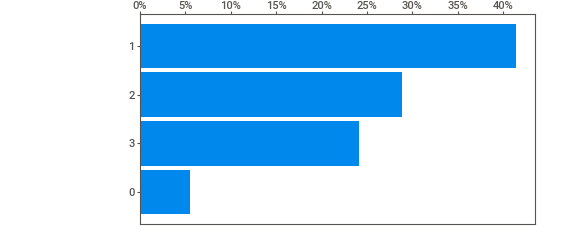
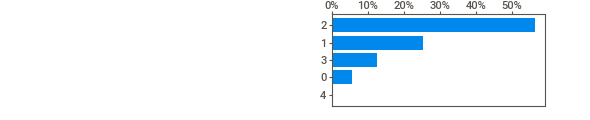
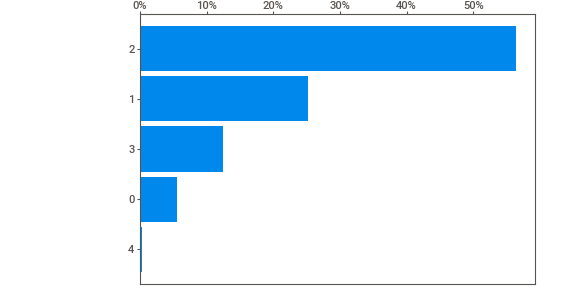
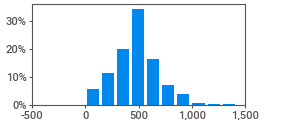
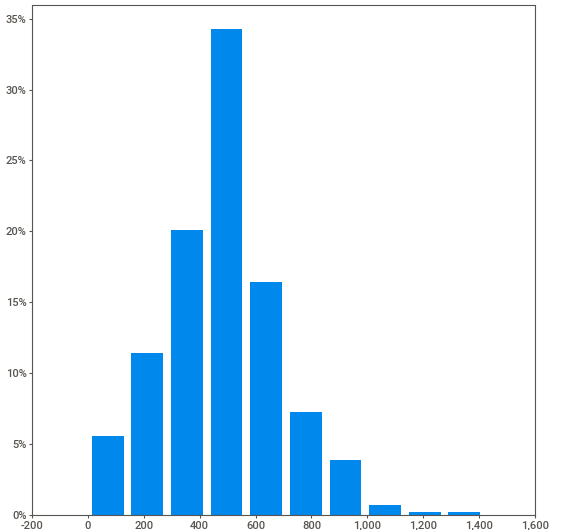
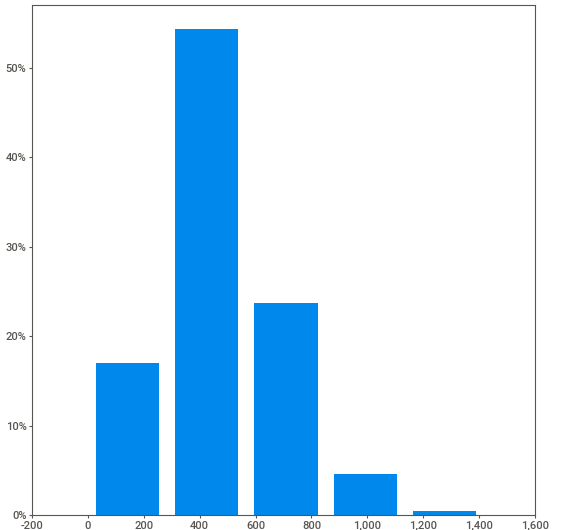
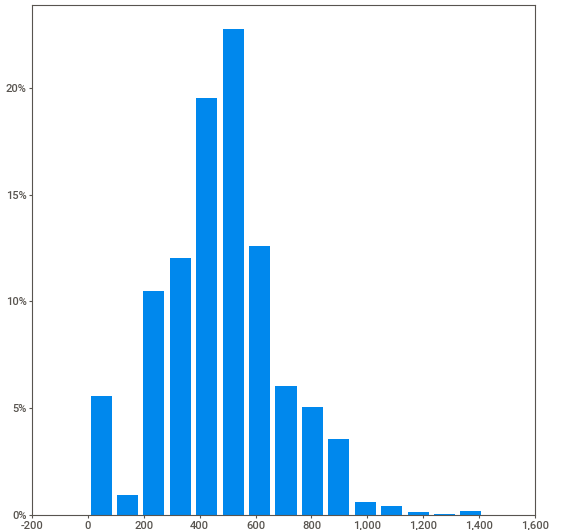
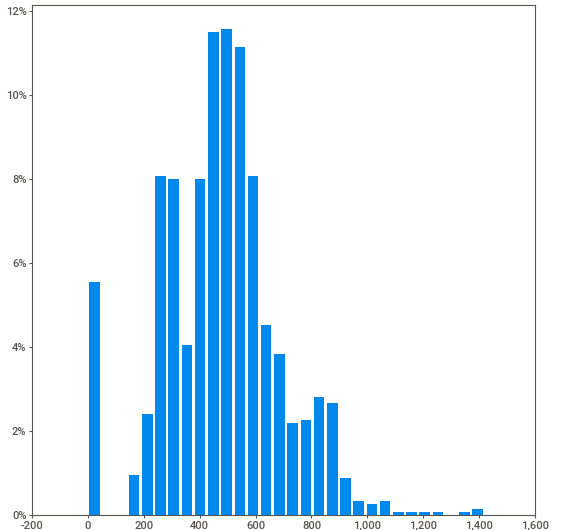
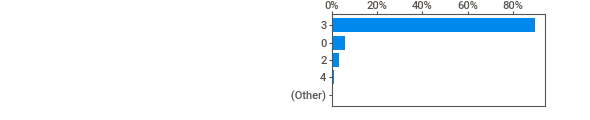
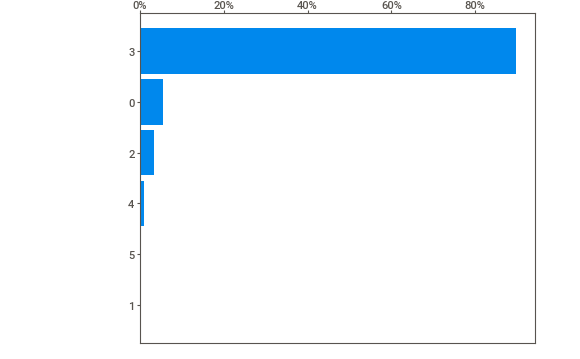
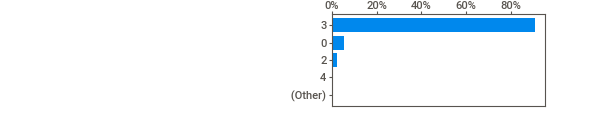
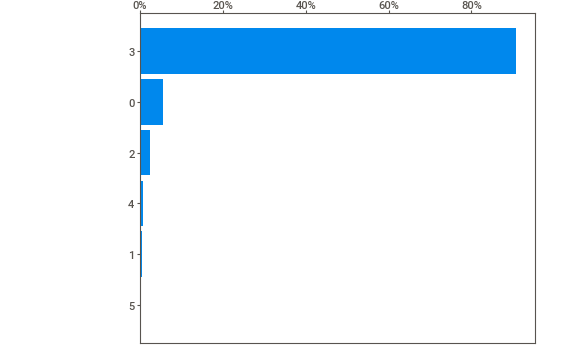
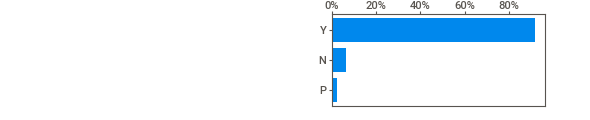
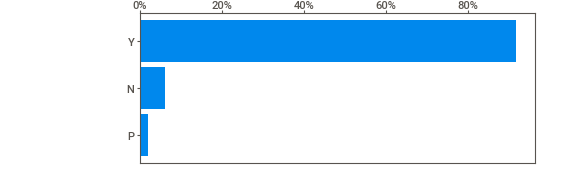
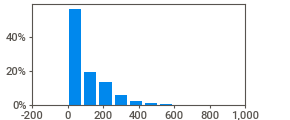
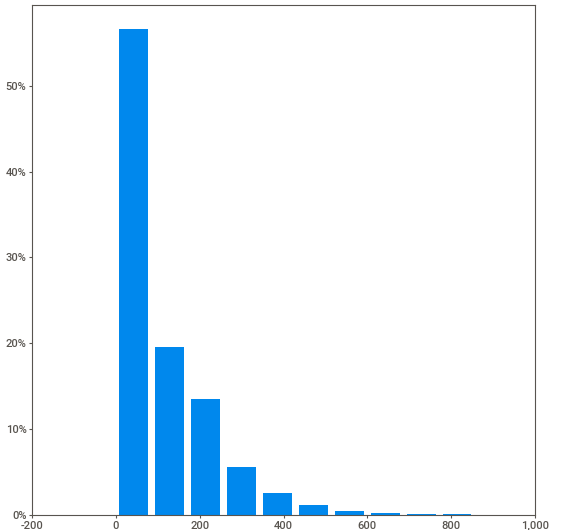
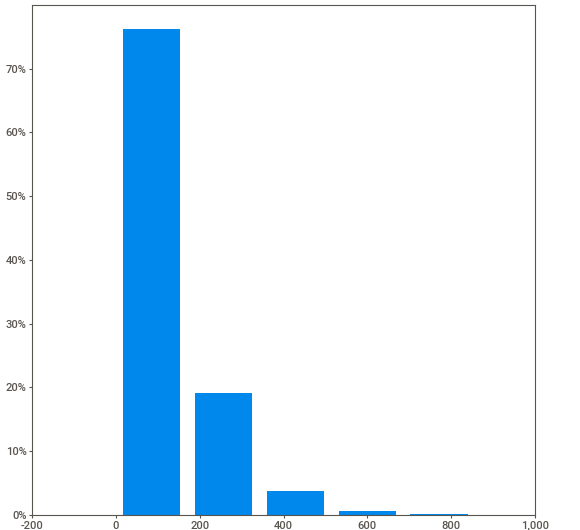
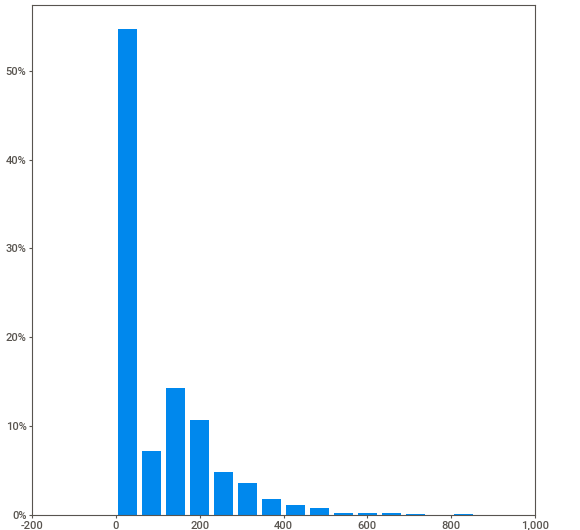
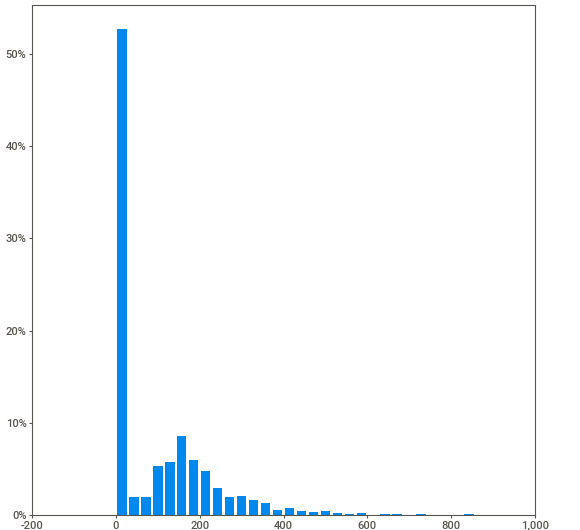
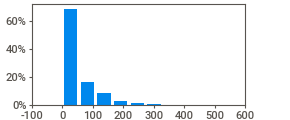
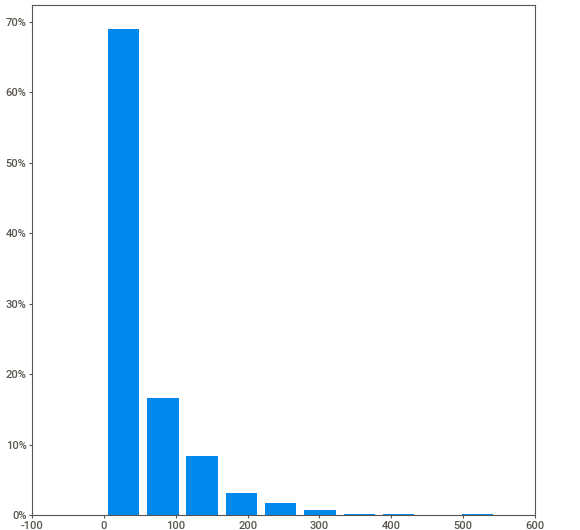
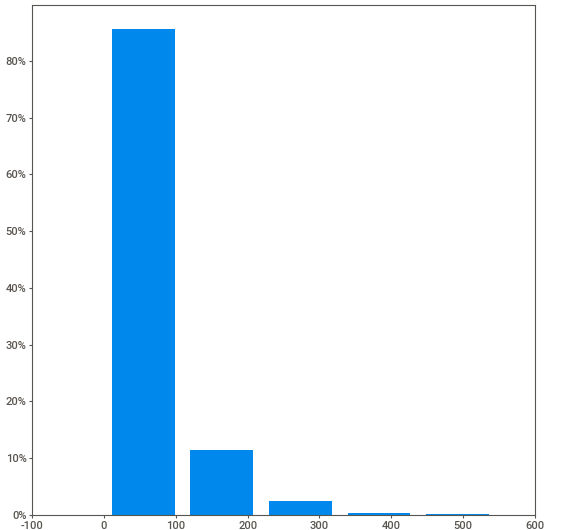
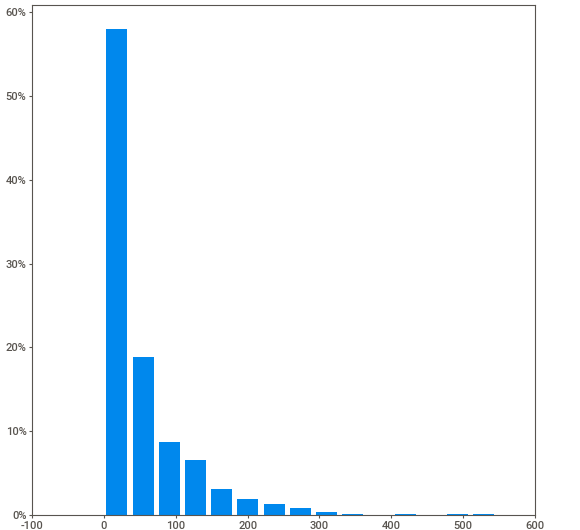
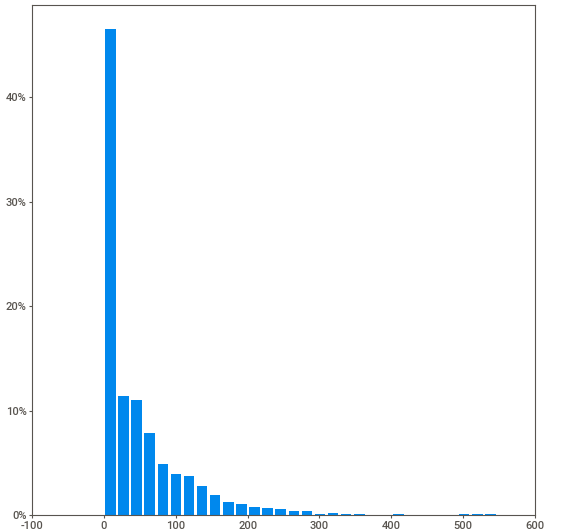
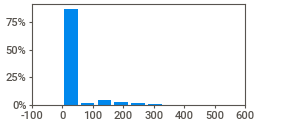
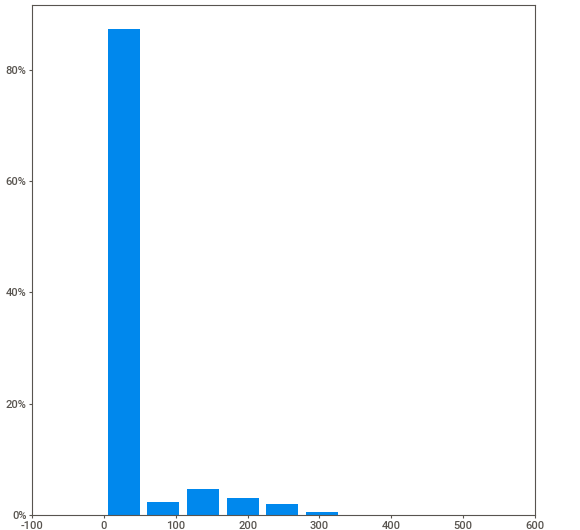
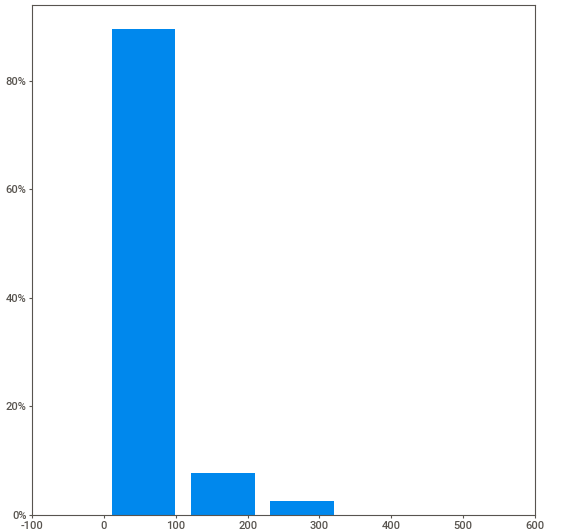
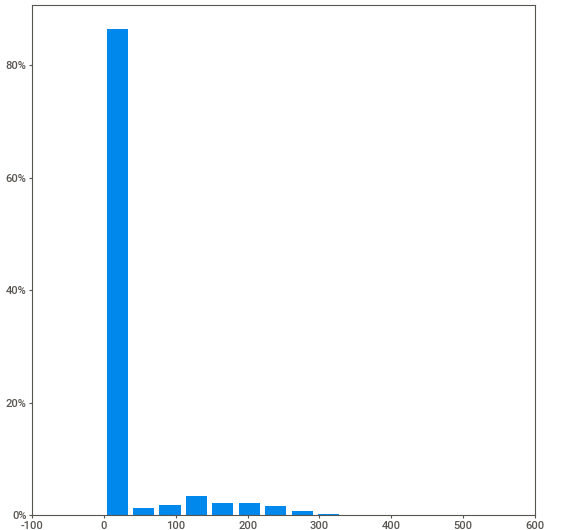
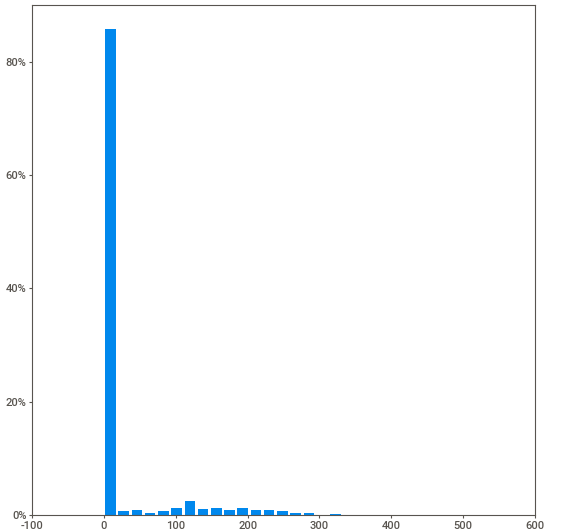
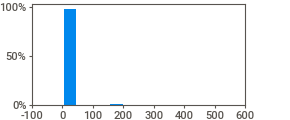
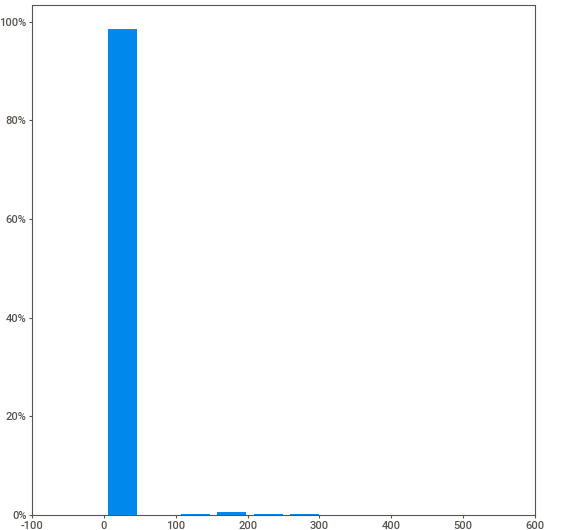
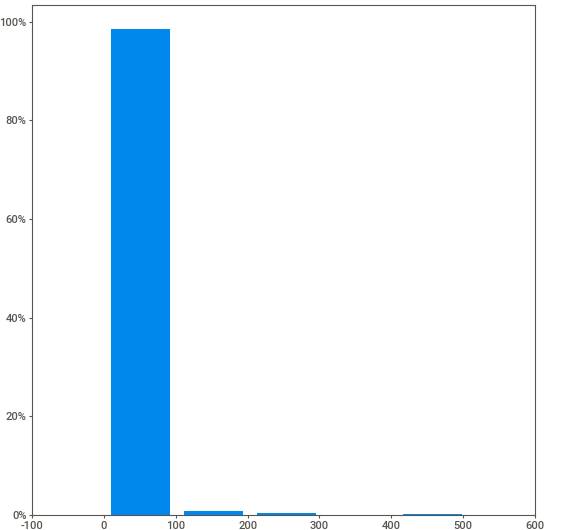
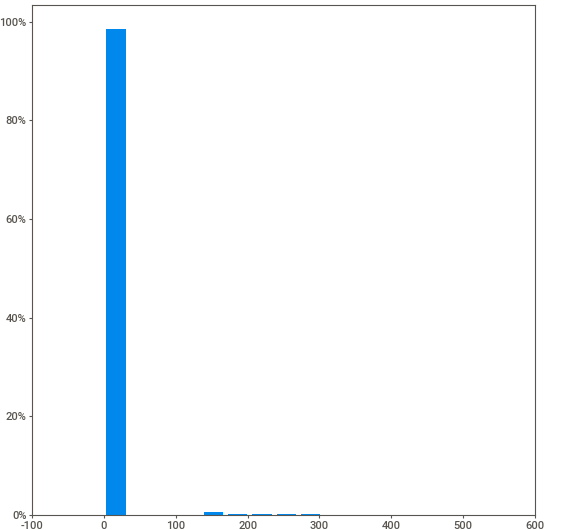
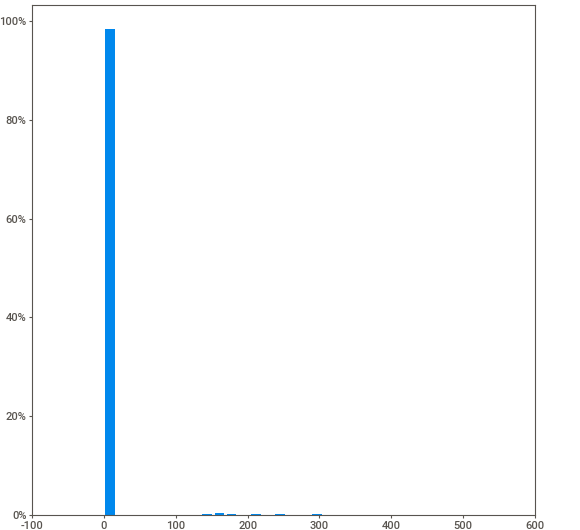
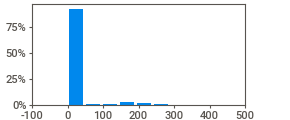
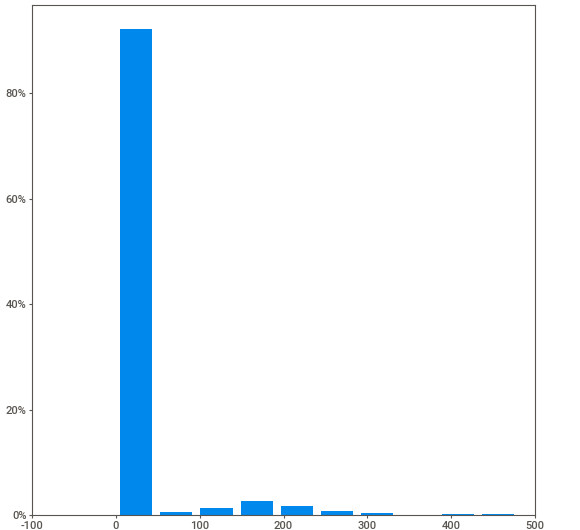
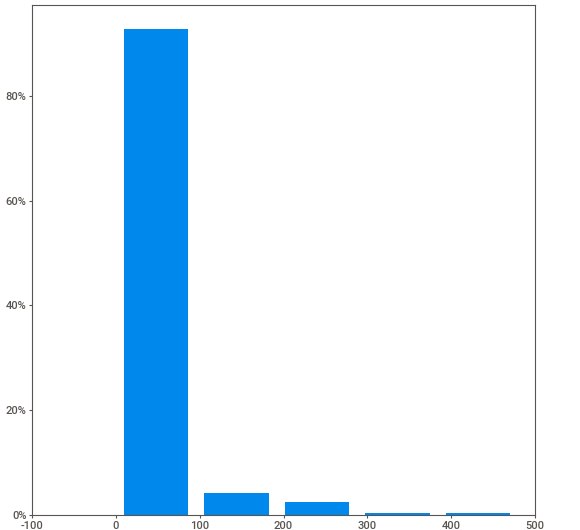
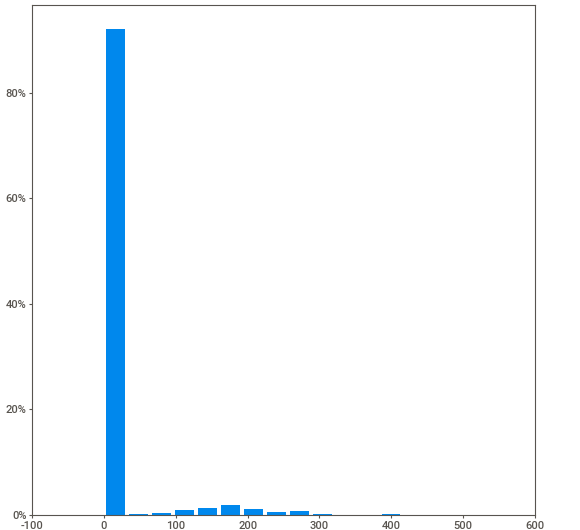
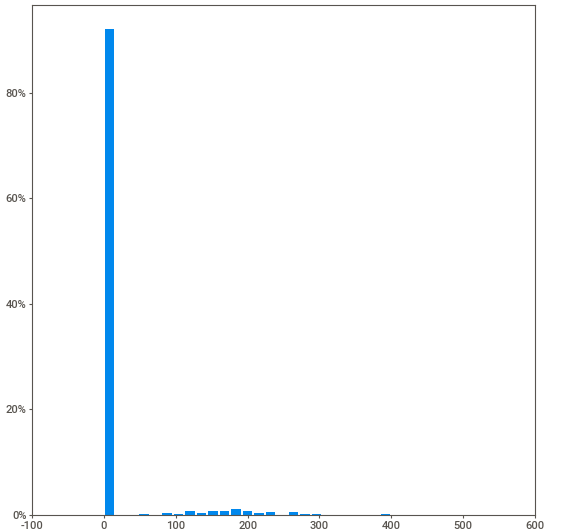
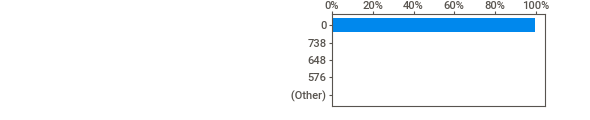
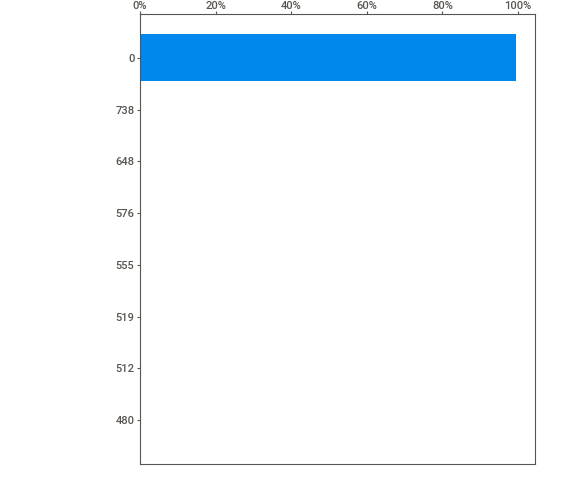
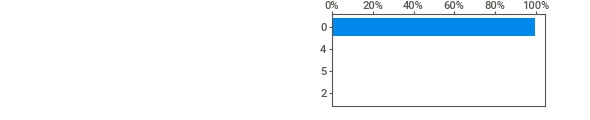
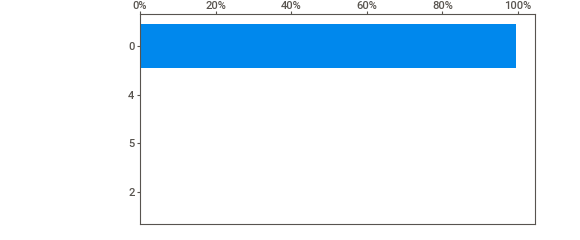
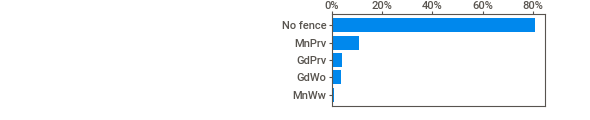
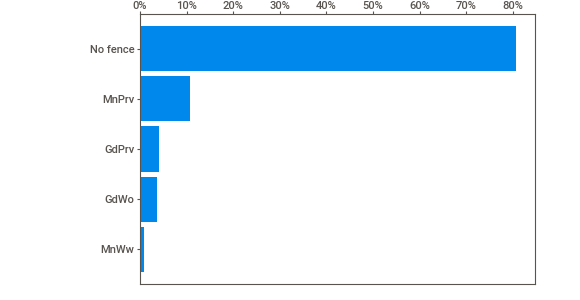
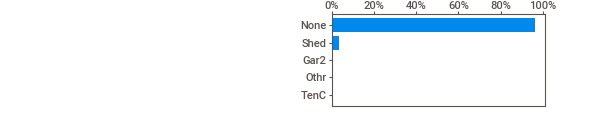
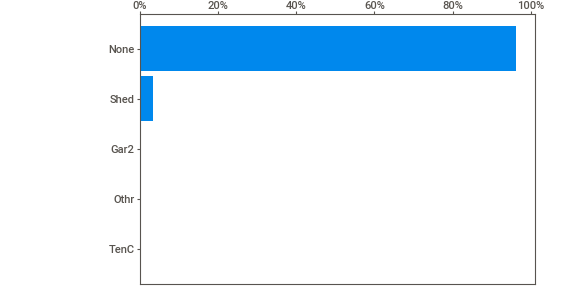
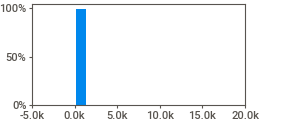
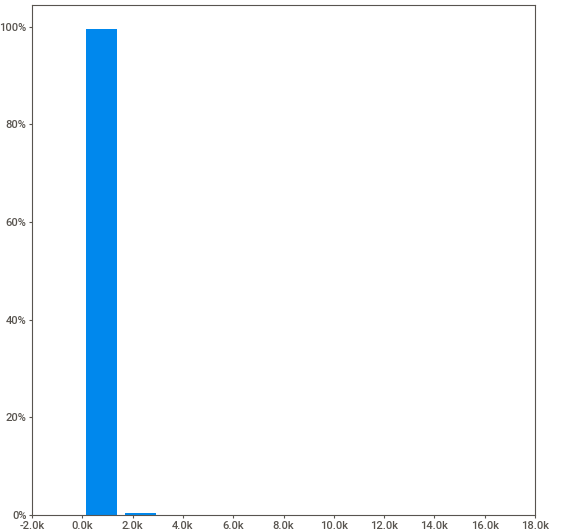
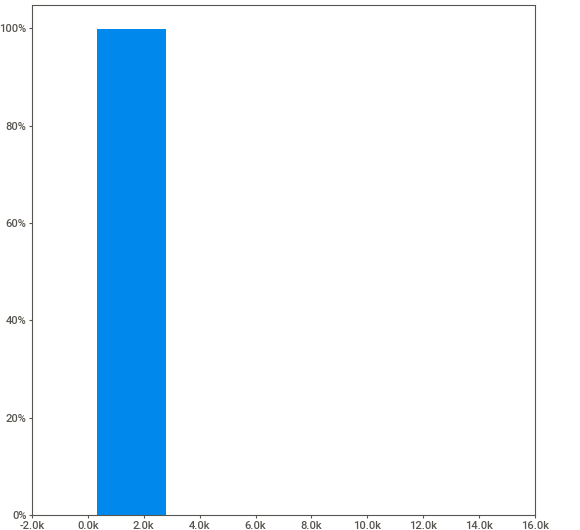
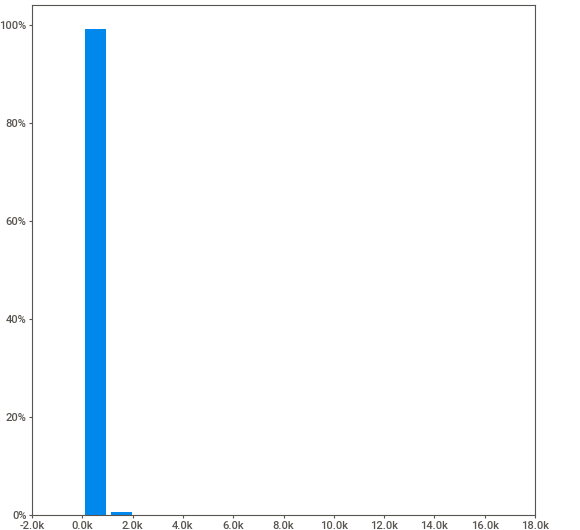
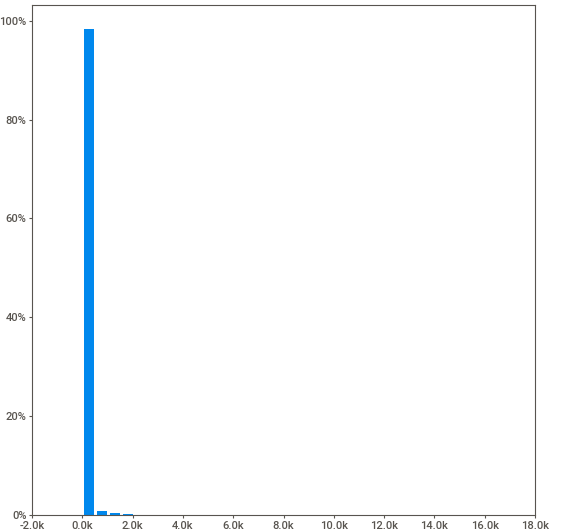
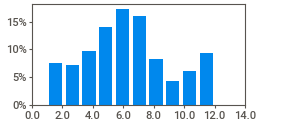
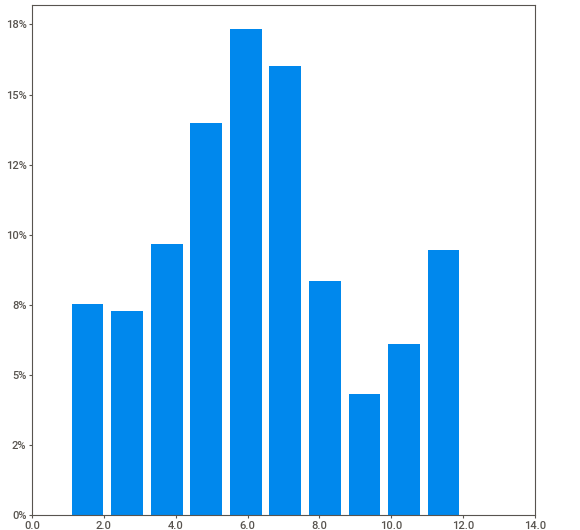
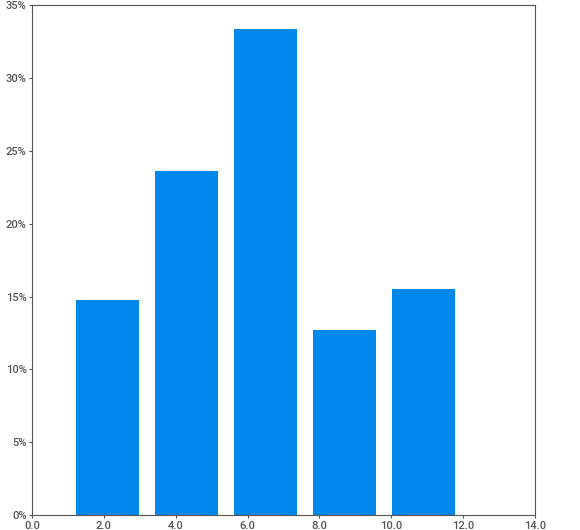
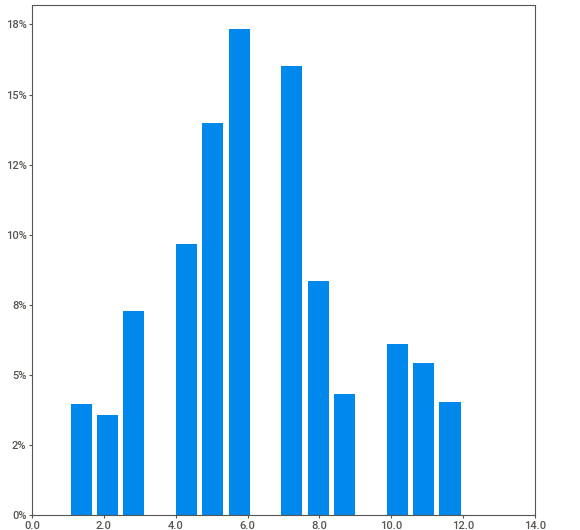
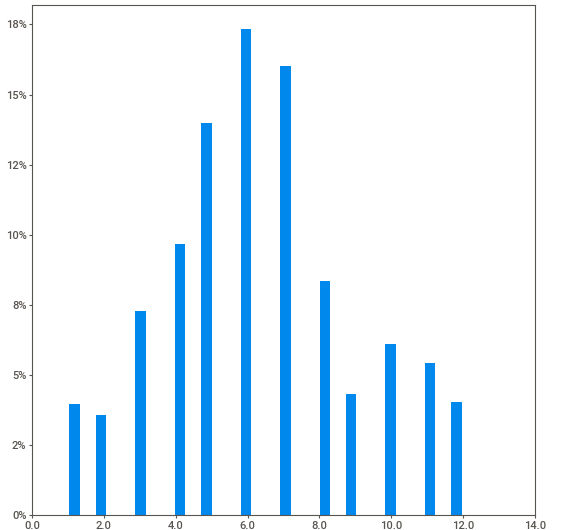
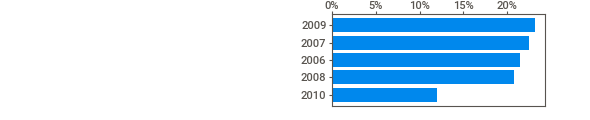
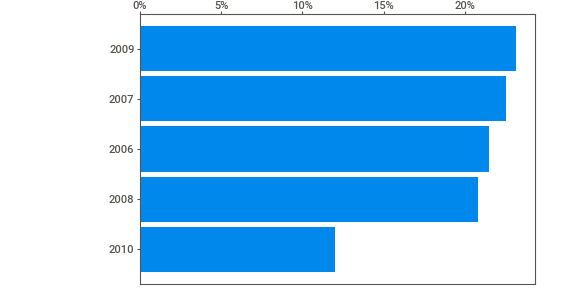
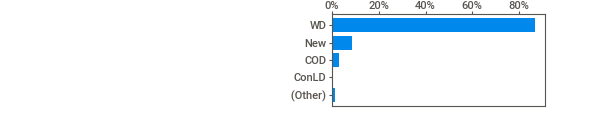
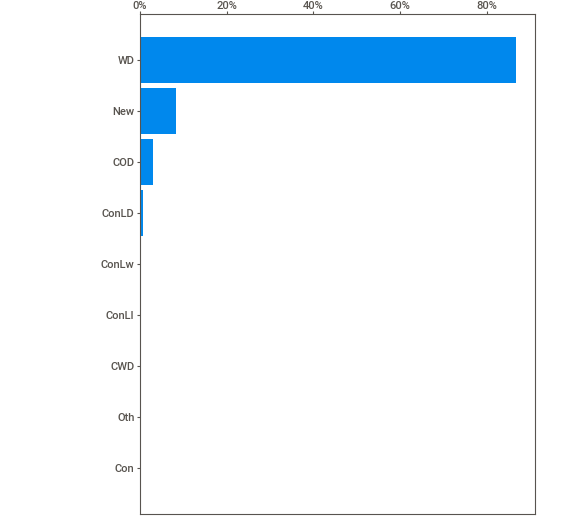
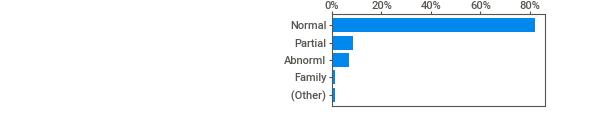
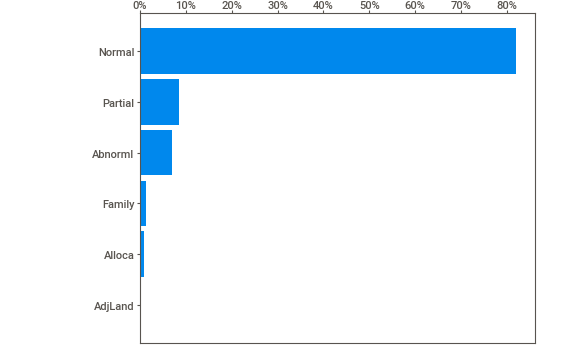
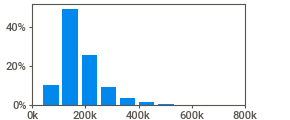
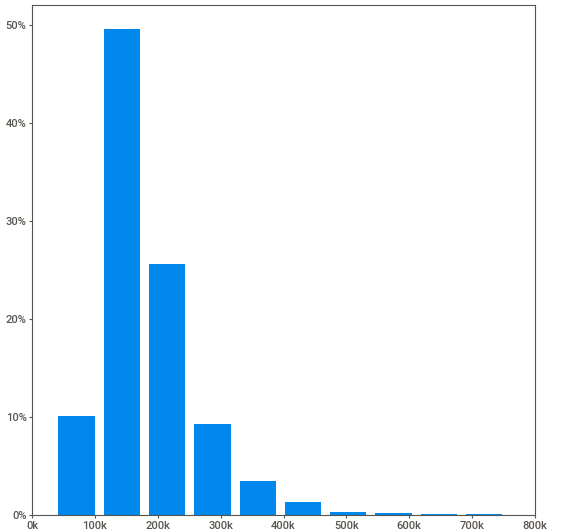
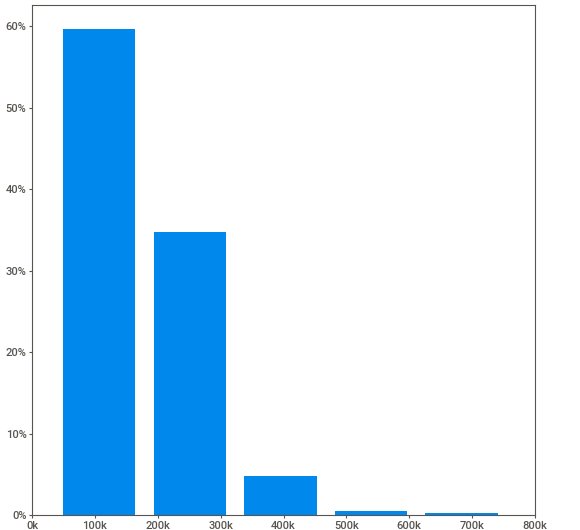
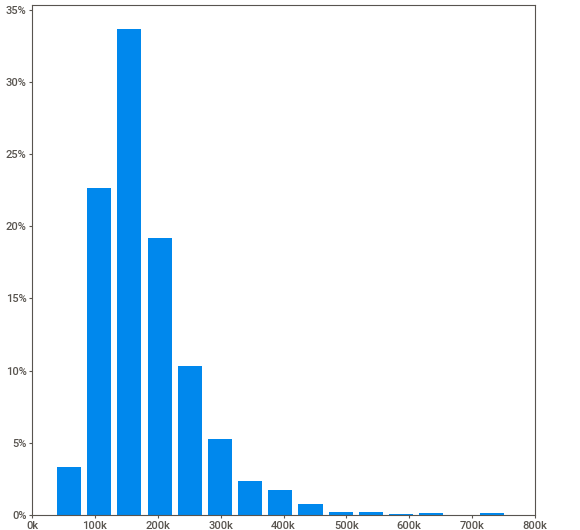
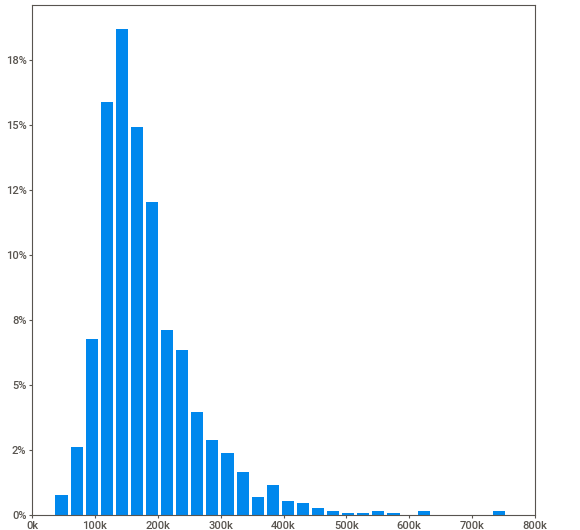
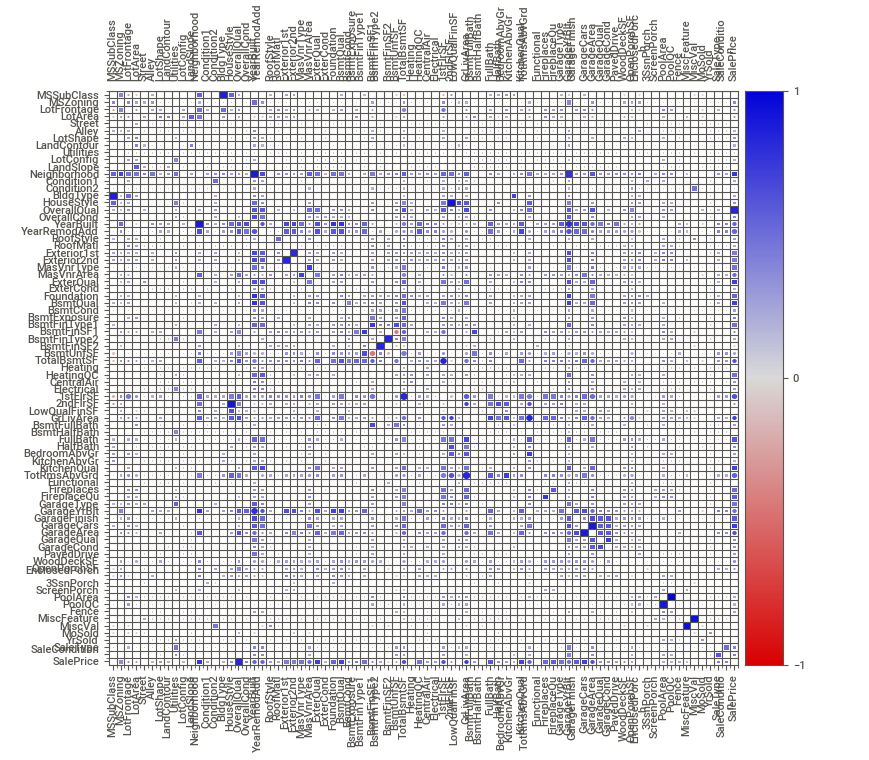
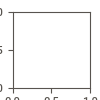

In [ ]:
#showing a report on the dataset
dataset_report = sw.analyze(dataset)
dataset_report.show_notebook(layout='vertical')

## Droppping features ✒

As an immidiate conculusion from the report, I see that some features  have a value that fills more than 90% of it, so features like that won't contribute to our models so we can drop them. 

In [ ]:
def drop_expected_features(df):
  dropped = []
  for col in df.columns:
          most_frequent_val = df[col].mode()[0] # Getting the most frequent value
          num_most_frequent = len(df[df[col] == most_frequent_val]) # Getting number of times it appears
          if num_most_frequent / len(df) > 0.90: # Checking that the most frequent value doesn't make too much of that column
              dropped.append(col)
              df.drop(col, axis=1, inplace=True)
  return dropped

In [ ]:
dropped_expected_features = drop_expected_features(dataset)

In [ ]:
print("not dropped " , len(dataset.columns), " cols and they are: ")
dataset.columns

not dropped  59  cols and they are: 


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

Mentioned below, we can see the columns that were dropped

In [ ]:
print("dropped " , len(dropped_expected_features), " cols and they are: ")
dropped_expected_features

dropped  21  cols and they are: 


['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal']

## Finiding the connection between all features to the target ⚡

In [ ]:
# get color map
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

# plot target values by each feature
def plot_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    plt.style.use('seaborn')
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=3, bottom=0, left=0, right=2.5)
    colors = get_cmap(len(df.columns))

    for i in range(len(df.columns)-1):
        df.plot(kind='scatter', x=df.columns[i], y=target_column_name, ax=axes[i//nrows, i%nrows], color=colors(i))
        axes[i//nrows, i%nrows].tick_params(axis='both', labelsize=8)
        axes[i//nrows, i%nrows].xaxis.label.set_size(8)
        axes[i//nrows, i%nrows].yaxis.label.set_size(8)
        axes[i//nrows, i%nrows].title.set_fontsize(8)

    for i in range(len(df.columns)-1, nrows*ncols): 
        fig.delaxes(axes.flatten()[i]) # Flattening so we can access axes array as a 1-d array to delete unused axes objects

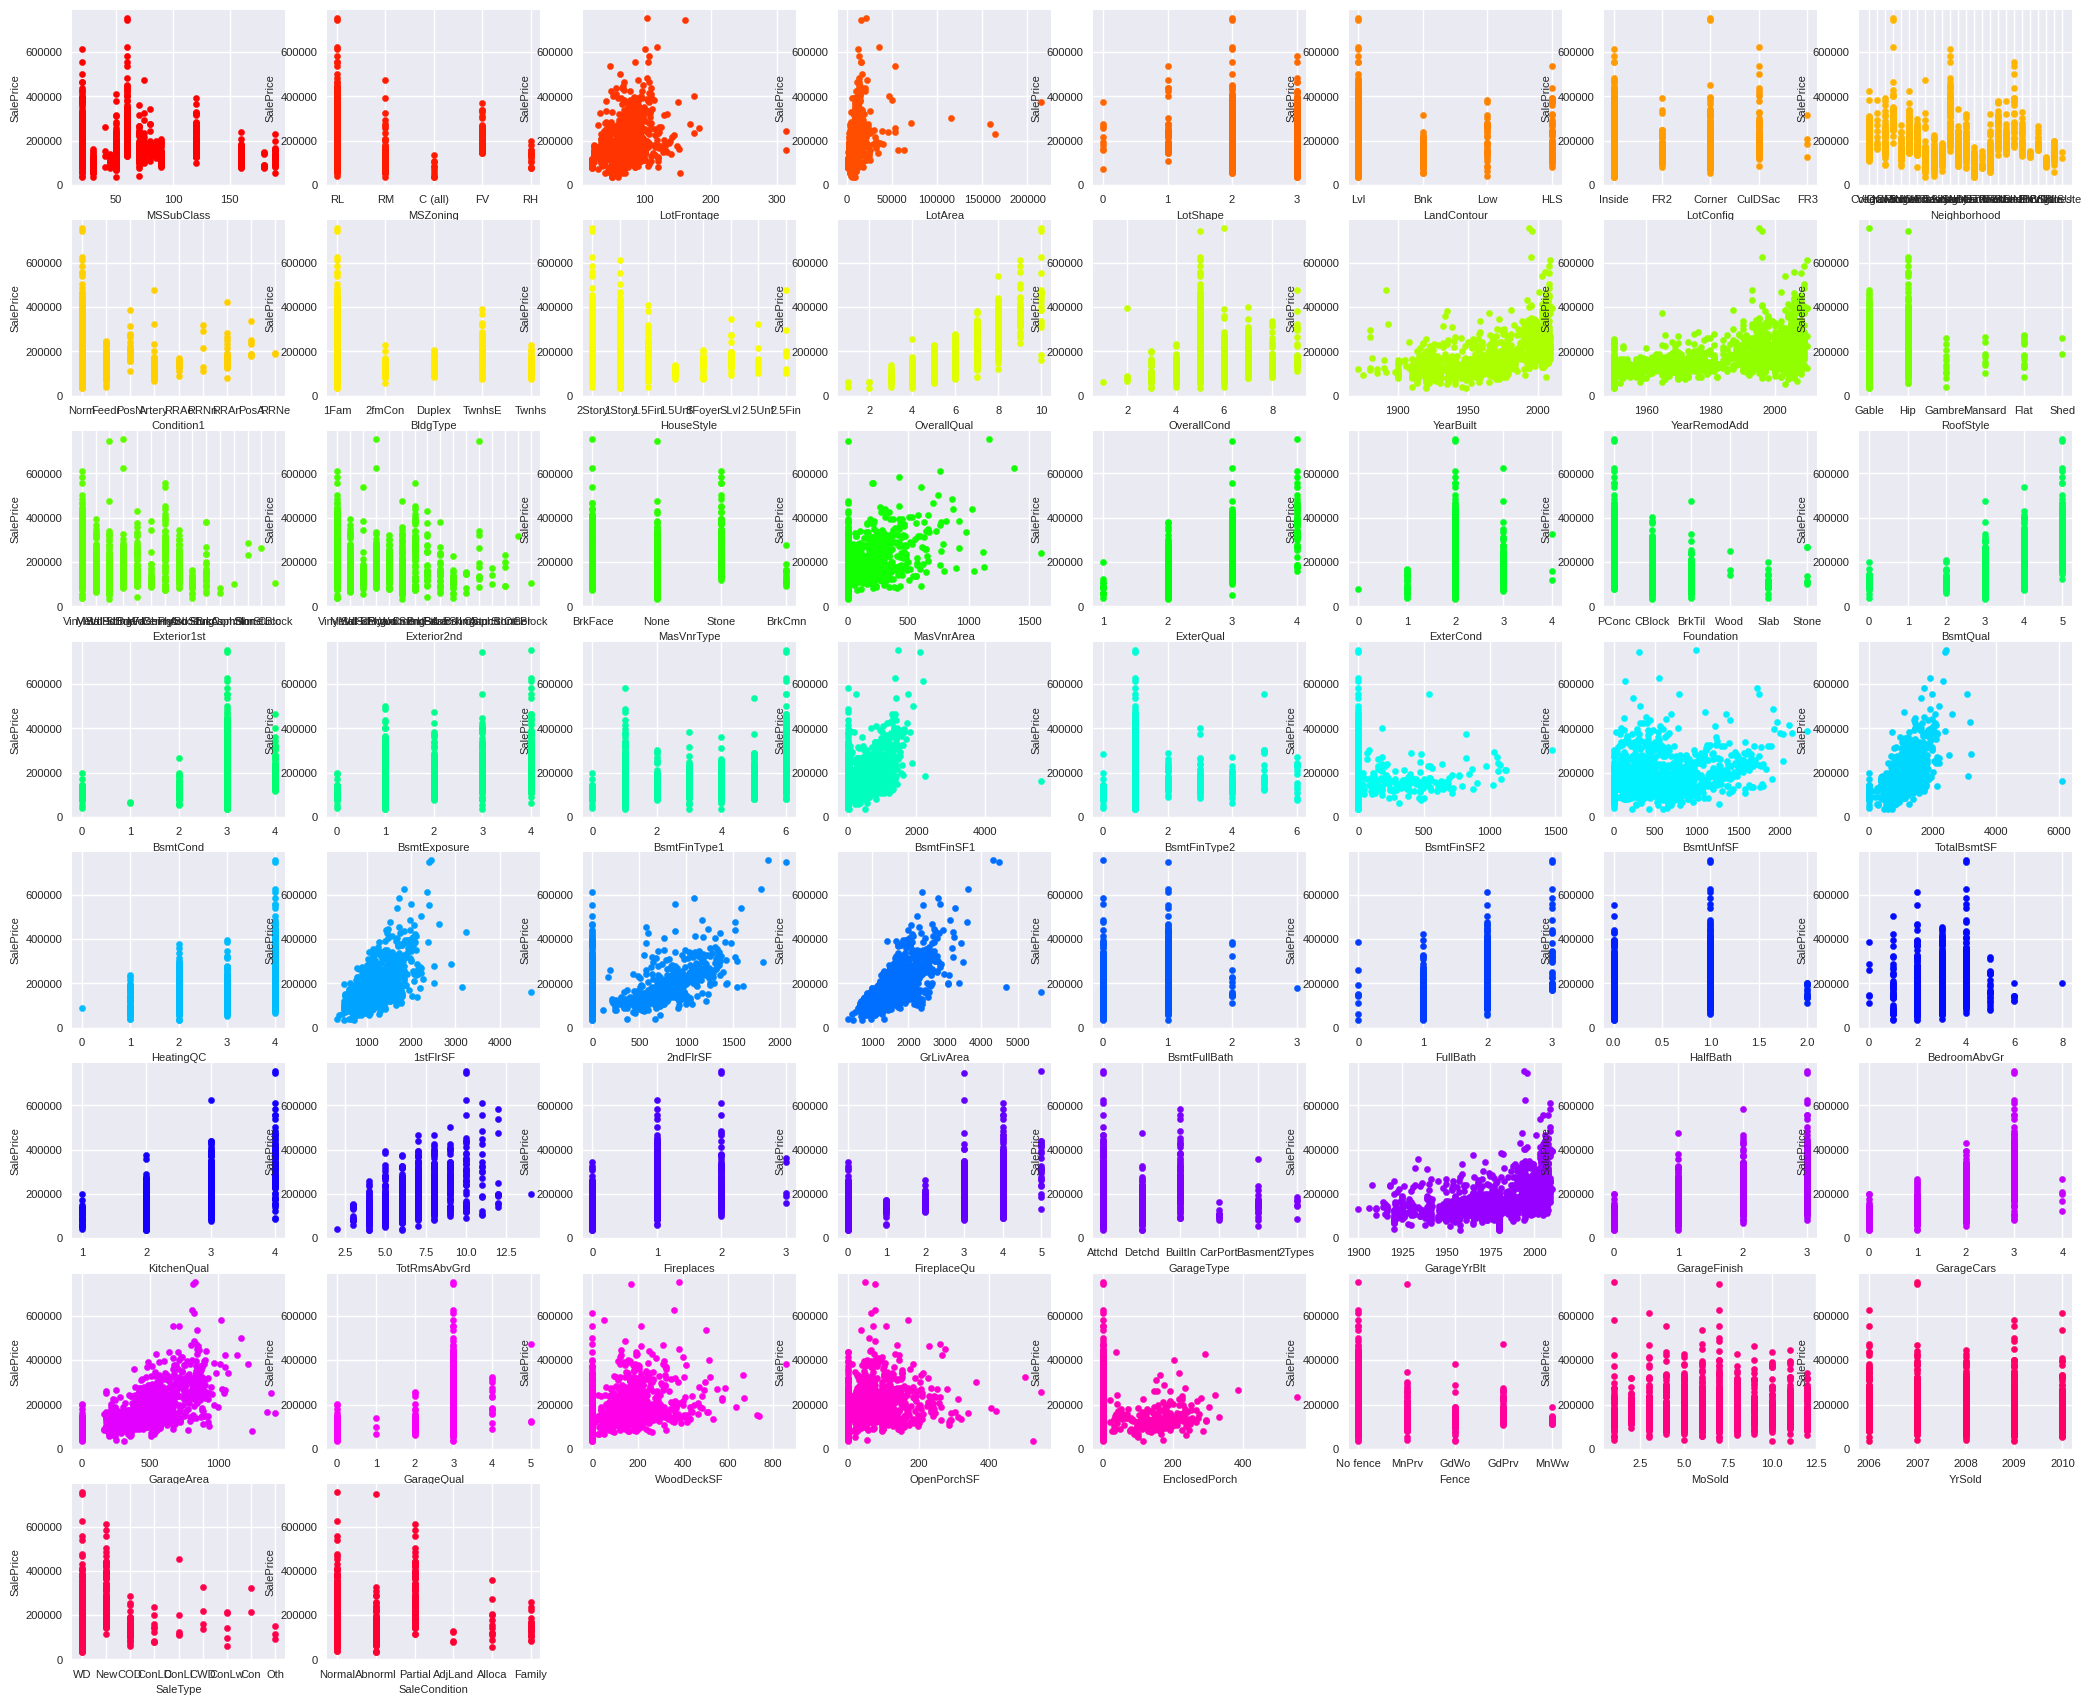

In [ ]:
plot_target_values_by_each_feature(dataset,"SalePrice")

As seen from the plots, there are some features that are in good [Correlation](https://en.wikipedia.org/wiki/Correlation) with `SalePrice` :


1.   `GrLivArea`
2.   `1stFlrSF`
3.    `GarageYrBlt`
4.    `LotFrontage`
5.   `TotalBsmtSF`

That means they will have a bigger inpact on the price.





## Changing the dataset: Encoding and normilizing ✒

Alot of the features are categorial, so encoding is necessary. Since there are too many features to make One Hot encoding, I will use the Ordinal encoder.

In [ ]:
dataset.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape           int64
LandContour       object
LotConfig         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation        object
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1         int64
BsmtFinType2       int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC          int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64


The next function will make the encoding and also normalize the data.

In [ ]:
# divide the data to features and target
t = dataset['SalePrice'].copy()
x = dataset.drop(['SalePrice'], axis=1)

In [ ]:
x

MSSubClass MSZoning  LotFrontage  ...  YrSold  SaleType SaleCondition
0             60       RL         65.0  ...    2008        WD        Normal
1             20       RL         80.0  ...    2007        WD        Normal
2             60       RL         68.0  ...    2008        WD        Normal
3             70       RL         60.0  ...    2006        WD       Abnorml
4             60       RL         84.0  ...    2008        WD        Normal
...          ...      ...          ...  ...     ...       ...           ...
1455          60       RL         62.0  ...    2007        WD        Normal
1456          20       RL         85.0  ...    2010        WD        Normal
1457          70       RL         66.0  ...    2010        WD        Normal
1458          20       RL         68.0  ...    2010        WD        Normal
1459          20       RL         75.0  ...    2008        WD        Normal

[1460 rows x 58 columns]

In [ ]:
# normalize t
t_norm =  np.log(t)

In [ ]:
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x.select_dtypes(include=['object', 'bool']).columns

all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", MinMaxScaler(), numerical_cols)]) 
x_encoded = pd.DataFrame(ct_enc_std.fit_transform(x, t), columns=all_cols)
x_encoded

MSZoning  LandContour  LotConfig  ...  EnclosedPorch    MoSold  YrSold
0          3.0          3.0        4.0  ...       0.000000  0.090909    0.50
1          3.0          3.0        2.0  ...       0.000000  0.363636    0.25
2          3.0          3.0        4.0  ...       0.000000  0.727273    0.50
3          3.0          3.0        0.0  ...       0.492754  0.090909    0.00
4          3.0          3.0        2.0  ...       0.000000  1.000000    0.50
...        ...          ...        ...  ...            ...       ...     ...
1455       3.0          3.0        4.0  ...       0.000000  0.636364    0.25
1456       3.0          3.0        4.0  ...       0.000000  0.090909    1.00
1457       3.0          3.0        4.0  ...       0.000000  0.363636    1.00
1458       3.0          3.0        4.0  ...       0.202899  0.272727    1.00
1459       3.0          3.0        4.0  ...       0.000000  0.454545    0.50

[1460 rows x 58 columns]

## Correlation ✒

In statistics, **correlation**  is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related. Familiar examples of dependent phenomena include the correlation between the height of parents and their offspring, and the correlation between the price of a good and the quantity the consumers are willing to purchase, as it is depicted in the so-called demand curve.




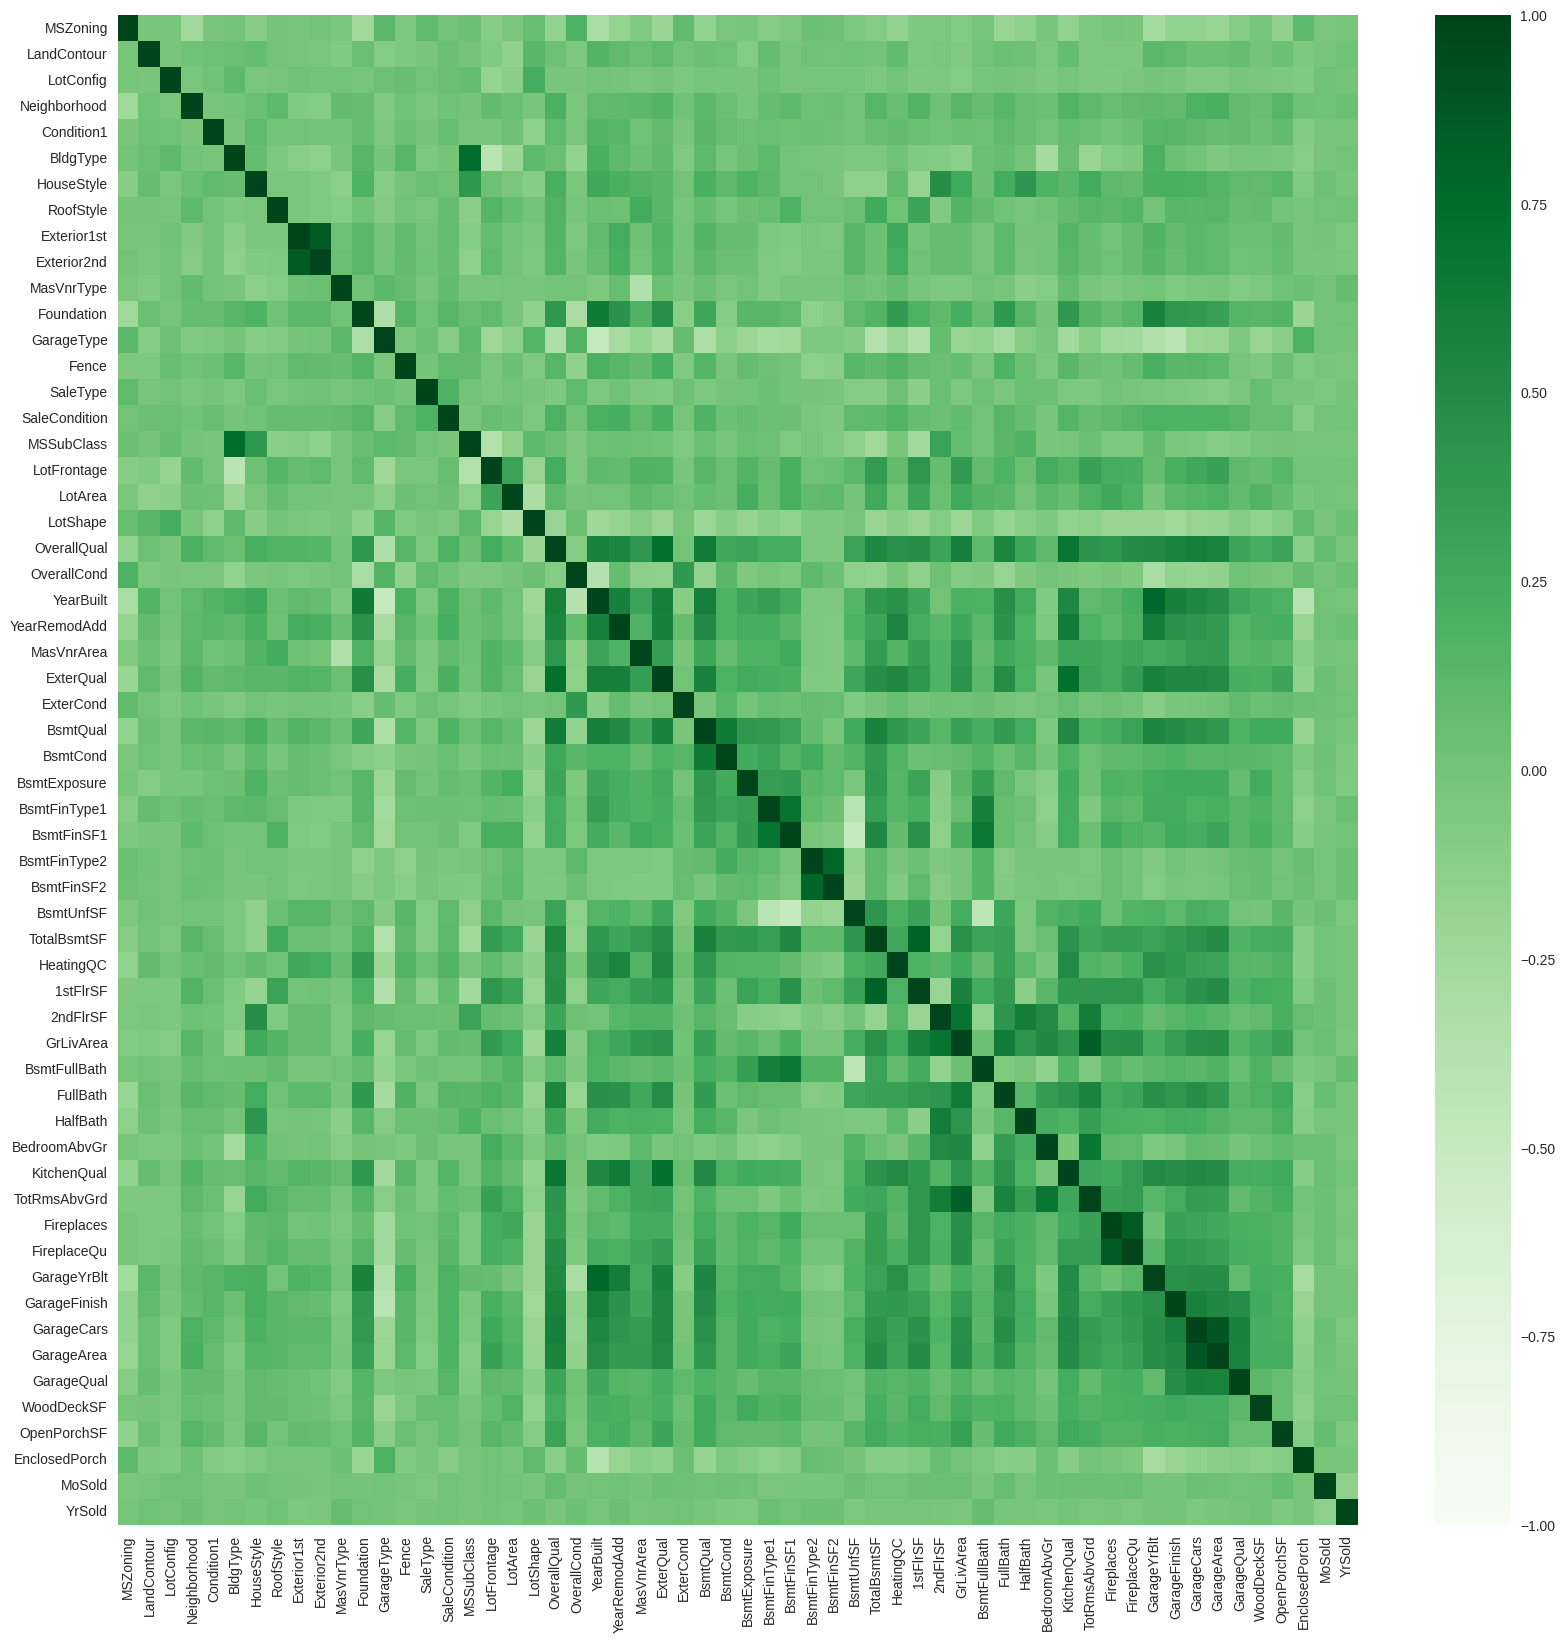

In [ ]:
plt.figure(figsize=(20,20))
cor = x_encoded.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Greens, vmin=-1, vmax=1)
plt.show()

As we can see, most of the features do not have high correlation which means they dont depend on each other. Thats means I wont have to drop them depending on this (they are not connected probably).

# Feature Selection & Regulation

there are more than 50 features that make the model complicated and with alot of dimensions. It can be a good idea to loose some features and to limit the polynom so the model I will create will not be overfited.

## Feature Selection ⚡

I will start by checking out Backward Feature Selection using Scikit-learn RFE

We can use Scikit-learn RFECV to use CV and choose the best number of features on this dataset.
The default CV is 5-fold cross-validation.
We will enter the Scikit-learn RepeatedKFold to repeat each KFold a few times with different splits.

In [ ]:
selector = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(x_encoded, t)
x_less_features = x_encoded.loc[:, selector.support_]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RFECV was fitted with feature names



In [ ]:
x_less_features

RoofStyle  MasVnrType  MSSubClass  ...  GarageQual  WoodDeckSF  OpenPorchSF
0           1.0         1.0    0.235294  ...         0.6    0.000000     0.111517
1           1.0         2.0    0.000000  ...         0.6    0.347725     0.000000
2           1.0         1.0    0.235294  ...         0.6    0.000000     0.076782
3           1.0         2.0    0.294118  ...         0.6    0.000000     0.063985
4           1.0         1.0    0.235294  ...         0.6    0.224037     0.153565
...         ...         ...         ...  ...         ...         ...          ...
1455        1.0         2.0    0.235294  ...         0.6    0.000000     0.073126
1456        1.0         3.0    0.000000  ...         0.6    0.407235     0.000000
1457        1.0         2.0    0.294118  ...         0.6    0.000000     0.109689
1458        3.0         2.0    0.000000  ...         0.6    0.427071     0.000000
1459        1.0         2.0    0.000000  ...         0.6    0.858810     0.124314

[1460 rows x 35 columns]

We can see that the selector chose for us 35 features where as before there were 58. 

## Hyper-Parameters Search ⚡
Most of our models have a lot of parameters that can be adjusted.
Each parameter value can make our model better (or worse).
We want to be able to find the best hyperparameters for our models.
We have two approaches:



1.   Grid Search
2.   Random Search

I will use the Grid since it checks all posibilites


In [ ]:
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1], 'learning_rate':['constant'], 'eta0':[0.0001, 0.001, 0.01, 0.1]}
gs_model = GridSearchCV(SGDRegressor(random_state=1), hyper_parameters).fit(x_encoded, t_norm)
print('best params', gs_model.best_params_)

best params {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'elasticnet'}


In [ ]:
gs_model2 = GridSearchCV(SGDRegressor(random_state=1), hyper_parameters).fit(x_less_features, t_norm)
print('best params', gs_model2.best_params_)

best params {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant', 'penalty': 'elasticnet'}


## Regularization ⚡

I will try both options and see whats better

In [ ]:
model = SGDRegressor(alpha=gs_model.best_params_['alpha'], learning_rate='constant', eta0=gs_model.best_params_['eta0'], penalty=gs_model.best_params_['penalty'])

In [ ]:
model2 = SGDRegressor(alpha=gs_model2.best_params_['alpha'], learning_rate='constant', eta0=gs_model2.best_params_['eta0'], penalty=gs_model2.best_params_['penalty'])

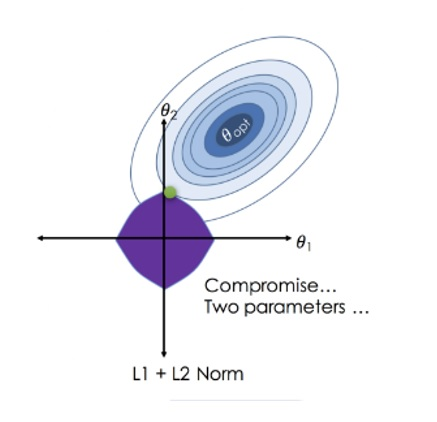

# Cross Validation 
checking if the features selected are good enough and which model is better

In [ ]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids] # Create train X and t
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids] # Create valid X and t
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train) #train the model

        y_train = model.predict(X_train) # Getting predictions
        y_val = model.predict(X_val)
        
        y_train = np.exp(y_train)
        y_val = np.exp(y_val)

        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, np.log(y_train), squared = False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, np.log(y_val), squared = False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

   

# Trying some expiriments

In [ ]:
get_cv_score_and_loss(x_less_features, t_norm, model, k=10,show_score_loss_graphs=True, use_pbar=True )

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
get_cv_score_and_loss(x_less_features, t_norm, model2, k=10,show_score_loss_graphs=True, use_pbar=True )

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
get_cv_score_and_loss(x_less_features, t_norm, model, k=5,show_score_loss_graphs=True, use_pbar=True )

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
get_cv_score_and_loss(x_less_features, t_norm, model2, k=5,show_score_loss_graphs=True, use_pbar=True )

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
get_cv_score_and_loss(x_less_features, t_norm, model2, p=1 ,show_score_loss_graphs=True, use_pbar=True )

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/1460 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning:

R^2 score is not well-defined with less than two sampl

# Results Analysis 

I chose to use linear regression and I can see, `model2` is better since it gives smaller loss and bigger score. The best parameters for it are:

`best params {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant', 'penalty': 'elasticnet'}`

# Getting the test ready and submitting

In [ ]:
# working on TEST data now
test_dataset = pd.read_csv('test.csv')

#save the id for submission
test_id = test_dataset['Id']

test_dataset

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]

In [ ]:
test_dataset.drop(columns='Id', inplace = True, axis =1) 

for column , dic in zip(all_replace, all_dics):
  replace_data(test_dataset, column, dic)

In [ ]:
for f in test_dataset.columns:
  for to_drop in dropped_expected_features:
        if f == to_drop:
            test_dataset.drop(f, axis=1, inplace=True)

In [ ]:
test_dataset

MSSubClass MSZoning  LotFrontage  ...  YrSold  SaleType SaleCondition
0             20       RH         80.0  ...    2010        WD        Normal
1             20       RL         81.0  ...    2010        WD        Normal
2             60       RL         74.0  ...    2010        WD        Normal
3             60       RL         78.0  ...    2010        WD        Normal
4            120       RL         43.0  ...    2010        WD        Normal
...          ...      ...          ...  ...     ...       ...           ...
1454         160       RM         21.0  ...    2006        WD        Normal
1455         160       RM         21.0  ...    2006        WD       Abnorml
1456          20       RL        160.0  ...    2006        WD       Abnorml
1457          85       RL         62.0  ...    2006        WD        Normal
1458          60       RL         74.0  ...    2006        WD        Normal

[1459 rows x 58 columns]

In [ ]:
empty = count_empty_values_in_each_column(test_dataset)

empty values
------------

MSZoning: 4
LotFrontage: 227
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 16
MasVnrArea: 15
BsmtFinSF1: 1
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
KitchenQual: 1
GarageType: 76
GarageYrBlt: 78
GarageCars: 1
GarageArea: 1
SaleType: 1


In [ ]:
for to_fill in empty:
  fill_missing_data(test_dataset, to_fill)

In [ ]:
count_empty_values_in_each_column(test_dataset)

empty values
------------



[]

In [ ]:
test_dataset

MSSubClass MSZoning  LotFrontage  ...  YrSold  SaleType SaleCondition
0             20       RH         80.0  ...    2010        WD        Normal
1             20       RL         81.0  ...    2010        WD        Normal
2             60       RL         74.0  ...    2010        WD        Normal
3             60       RL         78.0  ...    2010        WD        Normal
4            120       RL         43.0  ...    2010        WD        Normal
...          ...      ...          ...  ...     ...       ...           ...
1454         160       RM         21.0  ...    2006        WD        Normal
1455         160       RM         21.0  ...    2006        WD       Abnorml
1456          20       RL        160.0  ...    2006        WD       Abnorml
1457          85       RL         62.0  ...    2006        WD        Normal
1458          60       RL         74.0  ...    2006        WD        Normal

[1459 rows x 58 columns]

In [ ]:
numerical_cols_test = test_dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_test = test_dataset.select_dtypes(include=['object', 'bool']).columns

all_cols_test = categorical_cols_test.tolist() + numerical_cols_test.tolist()


ct_enc_std_test = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols_test),
            ("standard", MinMaxScaler(), numerical_cols_test)])
                               
x_encoded_test = pd.DataFrame(ct_enc_std_test.fit_transform(test_dataset), columns=all_cols_test) #activate the encoder and scaler for all cols
x_encoded_test





MSZoning  LandContour  LotConfig  ...  EnclosedPorch    MoSold  YrSold
0          2.0          3.0        4.0  ...            0.0  0.454545     1.0
1          3.0          3.0        0.0  ...            0.0  0.454545     1.0
2          3.0          3.0        4.0  ...            0.0  0.181818     1.0
3          3.0          3.0        4.0  ...            0.0  0.454545     1.0
4          3.0          1.0        4.0  ...            0.0  0.000000     1.0
...        ...          ...        ...  ...            ...       ...     ...
1454       4.0          3.0        4.0  ...            0.0  0.454545     0.0
1455       4.0          3.0        4.0  ...            0.0  0.272727     0.0
1456       3.0          3.0        4.0  ...            0.0  0.727273     0.0
1457       3.0          3.0        4.0  ...            0.0  0.545455     0.0
1458       3.0          3.0        4.0  ...            0.0  0.909091     0.0

[1459 rows x 58 columns]

In [ ]:
x_encoded_test_less = x_encoded_test.loc[:, selector.support_]

In [ ]:
x_encoded_test_less

RoofStyle  MasVnrType  MSSubClass  ...  GarageQual  WoodDeckSF  OpenPorchSF
0           1.0         2.0    0.000000  ...        0.75    0.098315     0.000000
1           3.0         1.0    0.000000  ...        0.75    0.275983     0.048518
2           1.0         2.0    0.235294  ...        0.75    0.148876     0.045822
3           1.0         1.0    0.235294  ...        0.75    0.252809     0.048518
4           1.0         2.0    0.588235  ...        0.75    0.000000     0.110512
...         ...         ...         ...  ...         ...         ...          ...
1454        1.0         2.0    0.823529  ...        0.00    0.000000     0.000000
1455        1.0         2.0    0.823529  ...        0.75    0.000000     0.032345
1456        1.0         2.0    0.000000  ...        0.75    0.332865     0.000000
1457        1.0         2.0    0.382353  ...        0.00    0.056180     0.043127
1458        1.0         1.0    0.235294  ...        0.75    0.133427     0.064690

[1459 rows x 35 columns]

In [ ]:
test_pred_model = model.predict(x_encoded_test_less)
test_pred_model_exp = np.exp(test_pred_model)

In [ ]:
result = pd.DataFrame()
result['Id'] = test_id
result['SalePrice'] = test_pred_model_exp
result.to_csv('Submission-liniarReg4.csv', index = False)

# Here is my subbmision to Kaggale

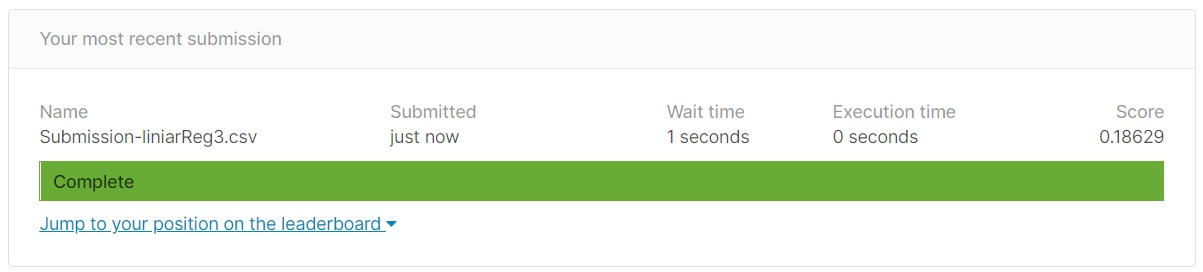

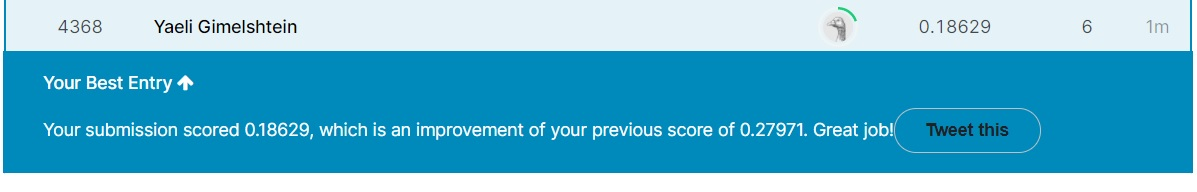

# Sum Up

After doing feature egineering,  bulding models and optimizing them by using feature selection and hyper parameters, I was able to create a Linear Reression model that gave me a score of 0.18629 on the test data set according to Kaggle.

While working with the data I could find some features that I decided to drop because they had the same value and that could make my models less accurate. 

This time the competition was more difficult for me because there were so many features, so it was harder to investigate the data, thank god for sweetviz.

# Bibliography



*   Almog's notebooks from the exercises
*   Doctor Google 😆 (not something in particular)



In [ ]:
%%shell
jupyter nbconvert --to html /content/Machine_Learning_hw2.ipynb

[NbConvertApp] Converting notebook /content/Machine_Learning_hw2.ipynb to html
[NbConvertApp] Writing 7176144 bytes to /content/Machine_Learning_hw2.html
